## Loan Defaulter Use Case
Banque Misr - 2nd Interview "Use Case"  
By: Hala Sedki

------

### Introduction

This case study demonstrates how to apply Exploratory Data Analysis (EDA) in a real-world business context. It not only employs EDA techniques but also provides insights into risk analytics within banking and financial services, illustrating how data can be leveraged to reduce the risk of financial loss when lending to customers.

### Understanding Business Aspect

Loan providers often struggle to approve loans due to insufficient or non-existent credit histories of applicants. This issue can be exploited by some consumers who may default on their loans. In a consumer finance company specializing in urban loans, it is crucial to use Exploratory Data Analysis (EDA) to identify patterns and ensure that applicants who can repay their loans are not unjustly rejected.

When assessing a loan application, the company faces two main risks:

1. **Missed Opportunities:** If a loan is not approved for an applicant who is likely to repay, the company loses potential business.
2. **Financial Loss:** Approving a loan for an applicant who is likely to default can result in financial loss.

The dataset includes information about loan applications, categorized into two scenarios:

1. **Clients with Payment Difficulties:** Those who had late payments exceeding a specified number of days on at least one of the initial installments.
2. **All Other Cases:** Instances where payments were made on time.

Decisions made during the loan process fall into four categories:

1. **Approved:** The loan application is accepted.
2. **Cancelled:** The client withdrew the application or declined the offered terms.
3. **Refused:** The loan was rejected due to unmet requirements.
4. **Unused Offer:** The loan was canceled at various stages of the process.

This case study will utilize EDA to explore how both consumer and loan attributes impact the likelihood of default.

### Business Objectives

This case study seeks to uncover patterns that signal potential difficulties in repaying loan installments. By identifying these patterns, the company can make informed decisions such as rejecting high-risk loans, adjusting loan amounts, or charging higher interest rates for riskier applicants. This approach helps ensure that only those capable of repaying are approved.

In essence, the goal is to pinpoint the key factors or variables that strongly indicate the likelihood of loan default. Understanding these driver variables will enable the company to better assess and manage risk within its loan portfolio.

------

#### READING THE DATA

We will start by reviewing the CSV file containing the current loan applications from customers. After analyzing this data, we will examine past application details for additional insights in a later phase.

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
# Filter out the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting maximum rows and columns display size to 200 for better visibility of data 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# Read the application data file

application_df = pd.read_csv('application_data.csv')
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Data Frame

In [5]:
# Check the number of rows and columns in the dataframe
application_df.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
application_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# Check the summary for the numeric columns
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Data Cleaning & Imputation

In this section we will perform data quality check by identifying missing values, incorrect data types etc. and by suggesting the best possible way to treat such data.

1. Check for any missing values and best possible metric to handle those missing values
2. Verify whether any column(s) has incorrect data type
3. For numerical columns, we will check for outliers
4. We will also perform binning of continuous variables


In [8]:
# Check for missing values in percentage 

round(100 * application_df.isnull().mean(),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [12]:
# Extract the column names with more than 50% data missing and their respective missing value percentage
missing50 = list(filter(lambda x: x[1] > 50, round(100 * application_df.isnull().sum() / len(application_df.index), 2).items()))

# Extract the column names from the above list
cols_to_drop = [i[0] for i in missing50]
cols_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

- Since the above columns have more than 50% data missing, it would be wise to drop these columns because if we keep them, they would impact our overal analysis.

In [13]:
# Remove the columns with more than 50% missing values

application_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape 

application_df.shape

(307511, 81)

In [14]:

# Check for % missing values for remaining columns

round(100 * application_df.isnull().sum() / len(application_df.index),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

#### Missing value imputation suggestions -


1. There are few columns with missing value percentage very close to 50%. Which are -

1. YEARS_BEGINEXPLUATATION_AVG     
2. FLOORSMAX_AVG                   
3. YEARS_BEGINEXPLUATATION_MODE    
4. FLOORSMAX_MODE                  
5. YEARS_BEGINEXPLUATATION_MEDI    
6. FLOORSMAX_MEDI                  
7. TOTALAREA_MODE                 
8. EMERGENCYSTATE_MODE             

- Suggestion - These columns should also be dropped as they have close to 50% data missing and if we impute them in some manner our dataset would be heavily biased and we will not be able to draw an appropriate insight.

2. There is this column OCCUPATION_TYPE  with 31.35% data missing. 

- Suggestion - As OCCUPATION_TYPE is a categorical variable and is of object type and since the missing value percentage is high (31.35%) we could NOT take its mode value to fill the missing ones because that will simply make the data biased. So, it would be safe to rather create a new type 'Unknown' to fill the missing values.

3. Columns with around 13% missing values. Now we are going to consider the columns with approximately 13% missing values and suggest the possible imputation strategies for each of them. From the above list the below columns are found to have around 13% values missing. Let's inspect them. Columns to be considered -



1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

In [15]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

- Suggestion - Here we can replace the missing values with the respective median value for all these columns. The reason for choosing median over mean is that these columns represent 'Number of enquiries...' which can't be a floating value. It must be a whole number and that's why we are going to use median to fill missing values. 

#### Data Type Correction -

There are certain columns in the data set which have incorrect data types. We can change them to appropriate data type.

Note: We cannot perform the data type change for some columns until we actually impute the missing data. In that case only suggestion is provided.

1. The below columns represent the number of enquires to Credit Bureau about the client. However, the data present are in float which is not correct. Here we need to change the data type to int.

- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR


2. Similarly for DAYS_REGISTRATION column, we need to change it into int as it shows the number of days.

In [16]:
# Changing DAYS_REGISTRATION column data type to int

application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].astype(int)

3. For CNT_FAM_MEMBERS column, which displays the number of family members of the client, we need to change it into int type as well since number of family member cannot be a float type. Before changing the data type, we must get rid of the missing values. Please note that there are only 2 rows of missing values, so we can replace it by the median value(since it must be a whole number)

In [17]:
# Check if any missing value in CNT_FAM_MEMBERS column

#application_df['CNT_FAM_MEMBERS'].isnull().sum()

In [18]:
# Replacing missing with median value for the CNT_FAM_MEMBERS column

#application_df['CNT_FAM_MEMBERS'].fillna(application_df['CNT_FAM_MEMBERS'].median(),inplace = True) 


In [19]:
# Changing CNT_FAM_MEMBERS column data type to int

#application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)

4. We can change the columns which represent Yes or No values as 0 and 1 into Category data type for better plotting and thus reading. 

In [20]:
# We can convert these DAYS columns into int data type as it is anyway going to be a whole number.

col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in col_list:
    application_df[i] = application_df[i].astype(int)

# We have NOT converted the data type of DAYS_LAST_PHONE_CHANGE 
# as it has some missing values which need to be treated (replace by median) first.

In [21]:
# Verify the changes

application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAYS_BIRTH         307511 non-null  int64  
 1   DAYS_EMPLOYED      307511 non-null  int64  
 2   DAYS_REGISTRATION  307511 non-null  int64  
 3   DAYS_ID_PUBLISH    307511 non-null  int64  
 4   CNT_FAM_MEMBERS    307509 non-null  float64
 5   DAYS_REGISTRATION  307511 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 14.1 MB


#### Data standardization -

1. There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values. The columns are -

- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [22]:
# Inspect the negative values in the DAYS columns

application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120327     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [23]:
# Make a list of all DAYS columns
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    application_df[i] = abs(application_df[i])

# Verify the changes
application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120327      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

Note: We can create a new column based on DAYS_BIRTH to show the age of the applicant for better readability and then we can drop the DAYS_BIRTH column. Similarly we can convert the other DAYS columns to represent the value in years.


In [24]:
# application_df['AGE'] = application_df['DAYS_BIRTH'] // 365
# application_df['YEAR_IN_SERVICE'] = application_df['DAYS_EMPLOYED'] // 365
# application_df['BANK_MEMBERSHIP_DURATION'] = application_df['DAYS_REGISTRATION'] // 365

2. We can also verify some of the categorical variables.

- CODE_GENDER

In [25]:
application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [26]:
# Get rid of improper value XNA by replacing it with NaN - not using mode as that would be imputation

application_df['CODE_GENDER'] = application_df['CODE_GENDER'].replace('XNA',np.nan)

In [27]:
# Verify again

application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

#### Outlier Analysis -

As we know, there are possibilities of having exceptionally low or high values in our data termed as outliers. It is of very much importance to identify such data points and get the data treated to avoid wrong interpretation. We are going to consider the below columns for outlier analysis.

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION

In [28]:
# Defining a function to plot outliers 

def outlier_plot(var,title,label):
    
    plt.figure(figsize = [8,5])
    plt.title(title, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(y = var)
    plt.ylabel(label, fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Grey'})
    plt.show()


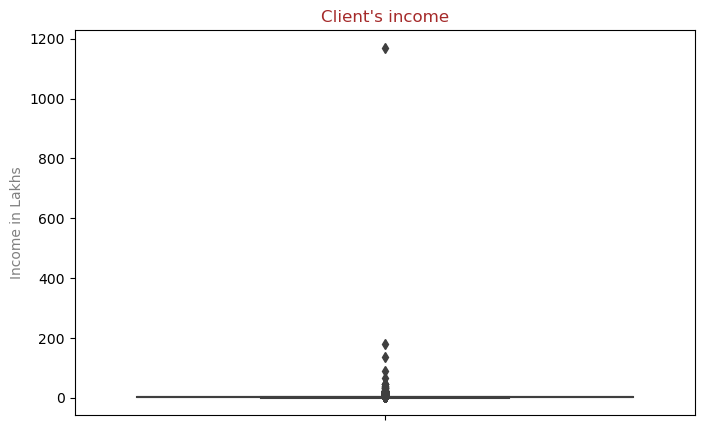

In [29]:
# Ploting boxplot on AMT_INCOME_TOTAL for outlier analysis

var = application_df['AMT_INCOME_TOTAL']/100000
title = "Client's income"
label = 'Income in Lakhs'

outlier_plot(var,title,label)

- AMT_INCOME_TOTAL(Income of the client) shows that some of the applicants have very high income as compared to others.

In [30]:
# Describe to check the summary

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

- There is definitely a huge difference between 75% and the maximum value. Let's print the quantile to check the difference between 0.95 or 0.99 quantile and the maximum value.

In [31]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL

(application_df['AMT_INCOME_TOTAL']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64

- AMT_INCOME_TOTAL - As we see there is a huge difference in 0.99 quantile and the maximum values. So, there are definitely outliers. As we know the income may vary from person to person, it would be good to decide on a cap value here and get rid of very high incomes. 

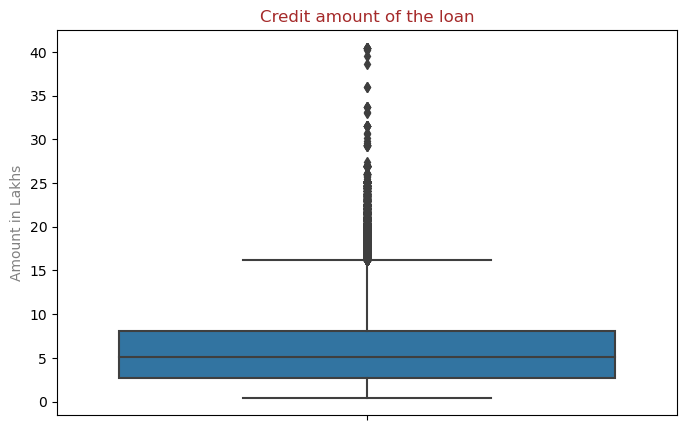

In [32]:
# Ploting boxplot on AMT_CREDIT for outlier analysis

var = application_df['AMT_CREDIT']/100000
title = "Credit amount of the loan"
label = "Amount in Lakhs"

outlier_plot(var,title,label)

- AMT_CREDIT(Credit amount of loan) has some outliers. Since the amount credits can vary from person to person based on the loan applied, their eligibility and other factors, it is considerable.
- Also we have more applications with credit amount in the lower range below 5 lakhs.


In [33]:
# Describe to check the summary

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

- We can see an increase in value after 75% but it is not very high. Let's check the quantiles.

In [34]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT

(application_df['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

- AMT_CREDIT - In this case we have some high value after 99% bt they are not significantly high. We can replace then with median.

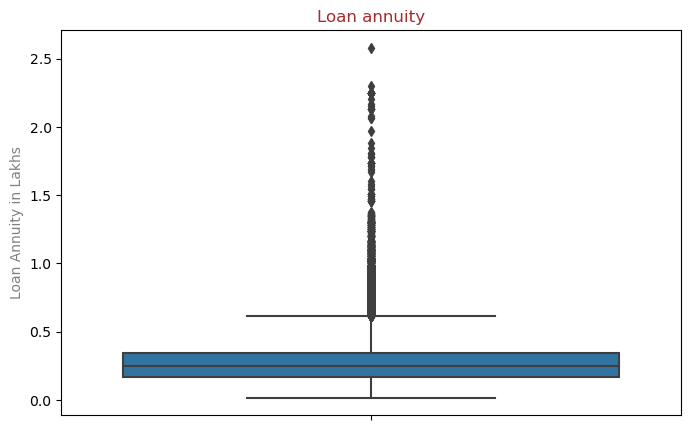

In [35]:
# Ploting boxplot on AMT_ANNUITY for outlier analysis

var = application_df['AMT_ANNUITY']/100000
title = "Loan annuity"
label = "Loan Annuity in Lakhs"

outlier_plot(var,title,label)

- AMT_ANNUITY(Loan annuity) also has some outliers but it is kind of continuous. There is no sudden significant rise in the value.

In [36]:
# Describe to check the summary

(application_df['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.271086
std           0.144937
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

- In this case as there is not a huge difference between 75% and the maximum value also the mean and median values are not much different , we can impute the outliers with median value.

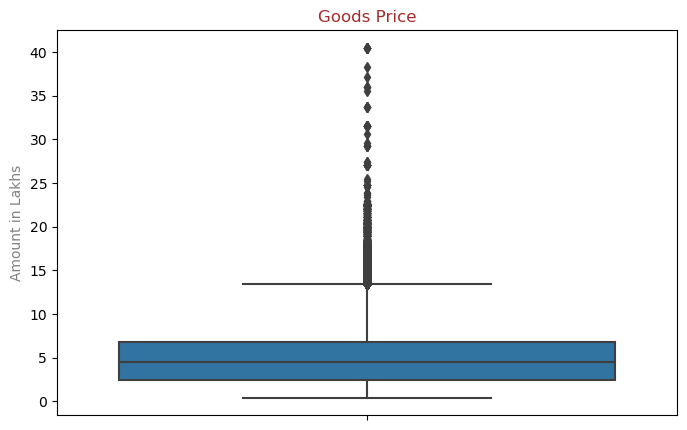

In [37]:
# Ploting boxplot on AMT_GOODS_PRICE for outlier analysis

var = application_df['AMT_GOODS_PRICE']/100000
title = "Goods Price"
label = "Amount in Lakhs"

outlier_plot(var,title,label)

In [38]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).describe()

count    307233.000000
mean          5.383962
std           3.694465
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [39]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
Name: AMT_GOODS_PRICE, dtype: float64

- Mean and Median are not very different. Also, form the quantiles, the 0.99 and the maximum values are not very far apart. So, we can impute with median.

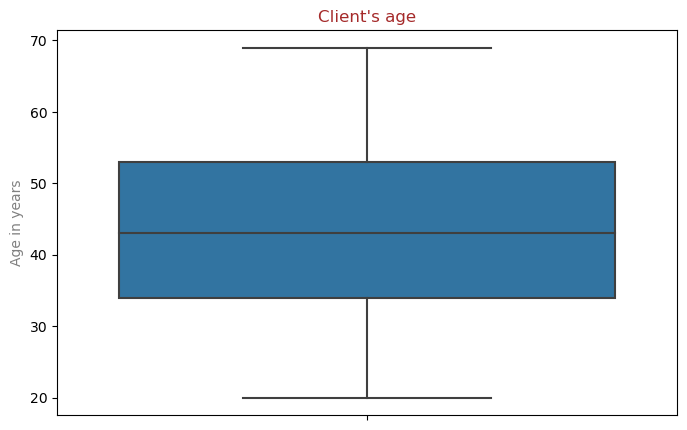

In [40]:
# Ploting boxplot on DAYS_BIRTH for outlier analysis

var = application_df['DAYS_BIRTH']//365
title = "Client's age"
label = "Age in years"

outlier_plot(var,title,label)

- DAYS_BIRTH - Client's age seems to have no outliers at all. No imputation or treatment required.

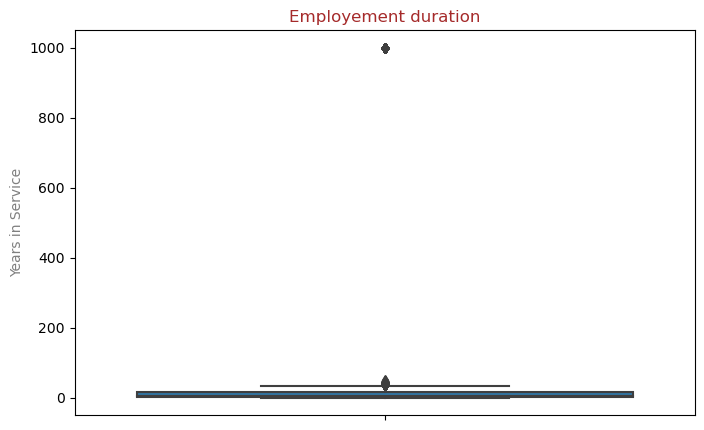

In [41]:
# Ploting boxplot on DAYS_EMPLOYED for outlier analysis

var = application_df['DAYS_EMPLOYED']//365
title = "Employement duration"
label = "Years in Service"

outlier_plot(var,title,label)

- DAYS_EMPLOYED(Employment duration) data surely has huge outliers which is clearly visible from the boxplot.Some data points are showing close to 1000 years in service which is impossible.

In [42]:
# Describe to check the summary

(application_df['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

- There is surely a huge difference in 75% and the maximum value. That explains the difference between mean and median value as well. Let's check the quantile.

In [43]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of DAYS_EMPLOYED

(application_df['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50       6.079452
0.70      12.150685
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [44]:
(application_df['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.8,0.85, 0.9])

0.50       6.079452
0.70      12.150685
0.80      25.172603
0.85    1000.665753
0.90    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

- In case of DAYS_EMPLOYED, we can see no difference between  0.90 quantile and the maximum value. However, there is a huge difference between 0.70 and 0.90 quantiles. Here, we can say that close to 20% data is not correct and hence is not reliable. We can cap the value at 80% in this case.

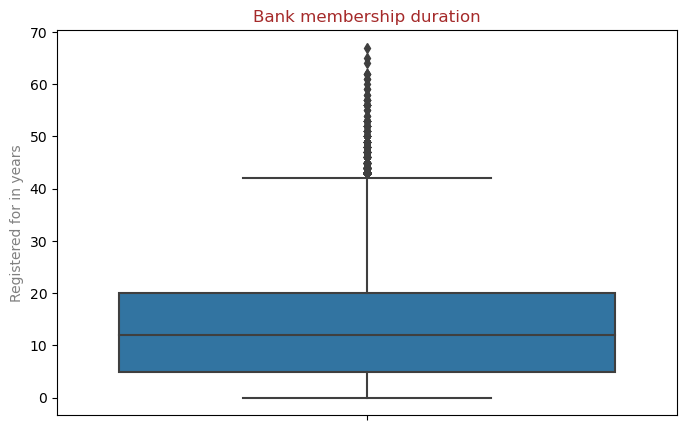

In [45]:
# Ploting boxplot on DAYS_REGISTRATION for outlier analysis

var = application_df['DAYS_REGISTRATION']//365
title = "Bank membership duration"
label = "Registered for in years"

outlier_plot(var,title,label)

- In case of DAYS_REGISTRATION - Bank membership duration, we can see that we have some applicants with the bank for very long time , close to 70 years, which is rare but not impossible. There are people who tie up with a bank and stay loyal to the same one for life time.

In [46]:
# Describe to check the summary

(application_df['DAYS_REGISTRATION']/365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

- We dont see much difference between mean and median. So, we can replace the outliers with median value. 

#### Binning

1. We may want to bin the applicants ages into certain categories to be able to draw some insights such as - whether the loan defaulters majorly fall into any certain age groups or which age groups are much likely to repay on time etc.

In [47]:
# Check the Age Summary - Since DAYS_BIRTH is in days, we have divided it by 365 to get it in years

(application_df['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [48]:
# Binning DAYS_BIRTH based on above summary

bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
application_df['AGE_GROUP'] = pd.cut(application_df['DAYS_BIRTH'] // 365, bins = bins, labels = labels )


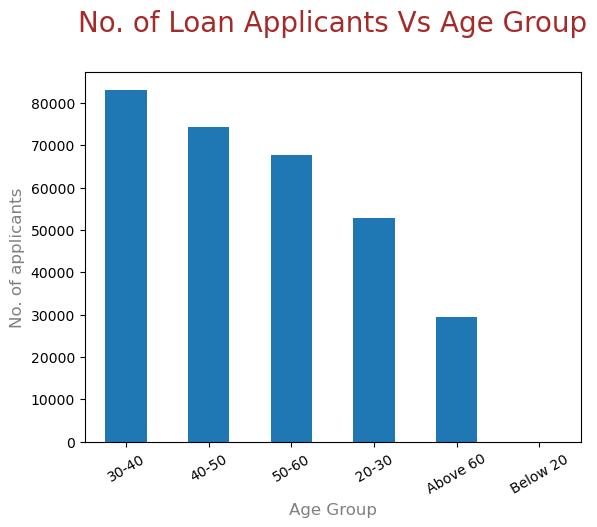

In [49]:
# Checking the values

application_df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Loan Applicants Vs Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Age Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- Maximum no. of loan applications are from age group 30-40, almost no applications below 20 age group (which is understandable as this group has very less chance of having an income).

2. Let's also bin the AMT_INCOME_TOTAL to categorize the total income of the applicants. 

Note: We can make the AMT_INCOME_TOTAL data more readable by changing the unit to lakhs.

In [50]:
# Check the Total income summary - we can divide it by 100,000 for better readability

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
# Binning AMT_INCOME_TOTAL based on above summary

bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
application_df['INCOME_GROUP'] = pd.cut(application_df['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )


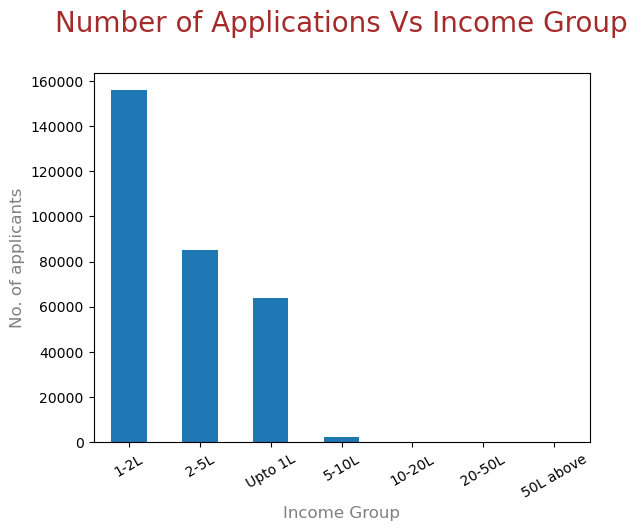

In [52]:
# Checking the values

application_df['INCOME_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Income Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Income Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- Maximum loan applicants are from lower income group i.e upto 5 lakhs. Bank should focus on this group.Also, we can cap the value at 20L.

3. We will also categorize the credit amount of the loan (AMT_CREDIT) column

In [53]:
# Check the credit amount of the loan - we can divide it by 100,000 for better readability

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [54]:
# Binning AMT_ANNUITY based on above summary

bins = [0,1,5,10,20,30,40,50,100]
labels = ['Upto 1L','1-5L','5-10L','10-20L','20-30L','30-40L','40-50L','50L above']
application_df['CREDIT_GROUP'] = pd.cut(application_df['AMT_CREDIT'] / 100000, bins = bins, labels = labels )

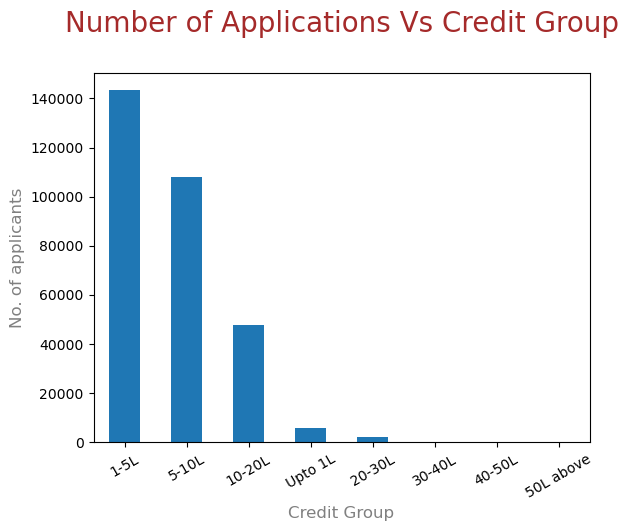

In [55]:
# Checking the values
application_df['CREDIT_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Credit Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Credit Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- The number of applicants with credit amount range 1-20L is very high. Almost none above 30L.

### Analyzing the Data

#### Imbalanced Data

What is Imbalance Percentage?

In our data set, there is a target variable/column named 'TARGET'. It represents whether the client is a defaulter or not.
If we segregate our dataset based on this column, and if the distribution turns out to be 50-50 i.e. 50% of the applicants are defaluters and the rest 50% are NOT, then our data set would be BALANCED. In any other case, it would be considered as IMBALANCED.

In [56]:
# Checking imbalance percentage

application_df['TARGET'].value_counts(normalize = True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

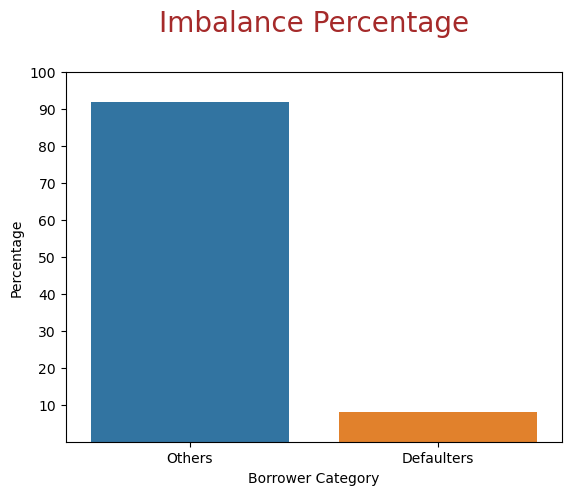

In [58]:
# Plotting imbalance percentage

#Extracting the imbalance percentage
Repayment_Status = application_df['TARGET'].value_counts(normalize=True)*100

# Defining the x values
x= ['Others','Defaulters']

# Defining the y ticks
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

sns.barplot(x=x, y=Repayment_Status)

# Adding plot title, and x & y labels
plt.title('Imbalance Percentage\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Borrower Category")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()

- As per the above data, we can say that our data set is imbalanced with almost 8% defaulters. Rest all 92% were able to repay the loans.

#### Segregate data based on TARGET column

Now, let's create 2 data sets to segregate our original data based on the TARGET column values to have defaulters in one dataframe and others in another.

In [59]:
# Creating data frame of Others

application_df0 = application_df[application_df['TARGET']==0]
application_df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [60]:
# Creating data frame of Defaulters

application_df1 = application_df[application_df['TARGET']==1]
application_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   
40                    0.025164       17482           1262               1182   
42                    0.007305       13384           3597                 45   
81                    0.028663       24794         365243               5391   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

#### Univariate Analysis

##### Categorical Variable Analysis

We will plot graphs of the below categorical variables to draw inferences-

- NAME_CONTRACT_TYPE
- CODE_GENDER
- OCCUPATION_TYPE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- INCOME_GROUP
- AGE_GROUP

In [65]:
def univariate_categorical_plot(category1, category2, xlabel):
    
    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.countplot(category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(1,2,2)
    sns.countplot(category2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [66]:
# Defining a function to plot defaulter percentage against univariate categorical variable

def perc_defaulter(col1, col2, title, xlabel):
    
    tempdf = application_df[[col1,col2]].groupby([col2], as_index=False).mean()

    tempdf[col1] = tempdf[col1]*100
    tempdf.sort_values(by=col1, ascending=False, inplace=True)

    sns.barplot(x=col2, y = col1, data = tempdf)
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.ylabel('Defaulter %')
    plt.xticks(rotation=45, ha='right')
    plt.show()


##### NAME_CONTRACT_TYPE

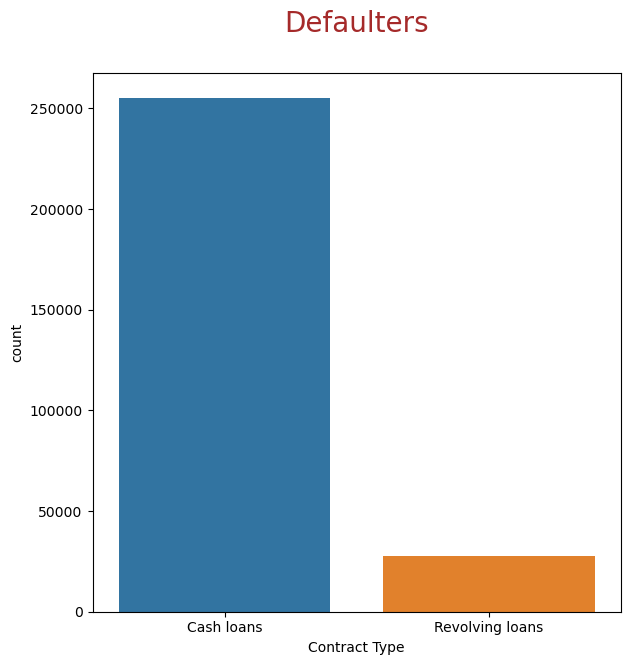

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming category1 and category2 are your categorical variables
plt.figure(figsize=[15, 7])

plt.subplot(1, 2, 1)
sns.countplot(data=application_df0, x='NAME_CONTRACT_TYPE')
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
plt.xlabel('Contract Type')

plt.show()

- Cash loan type contracts are high in number in both cases.

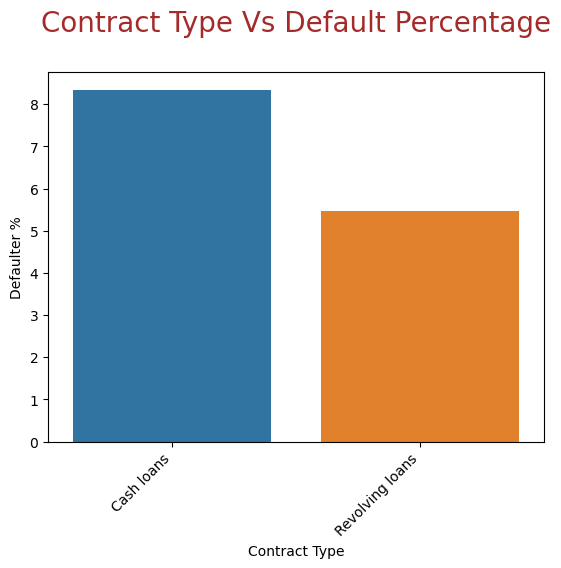

In [70]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_CONTRACT_TYPE'
title = 'Contract Type Vs Default Percentage\n'
xlabel = 'Contract Type'

perc_defaulter(col1, col2, title, xlabel)

- Cash loan contract type are more likely to fail repayment

##### CODE_GENDER

In [87]:
def univariate_categorical_plot(category1, category2, xlabel):
    plt.figure(figsize=[15, 7])
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)

    plt.subplot(1, 2, 2)
    sns.countplot(x=category2)
    plt.title('Non-Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)

    plt.show()

- In either case, we have more female clients as compared to males. But we actually need to see the percentage of defaulters in these 2 gender categories to actually say which gender is more likely to become a defaulter.

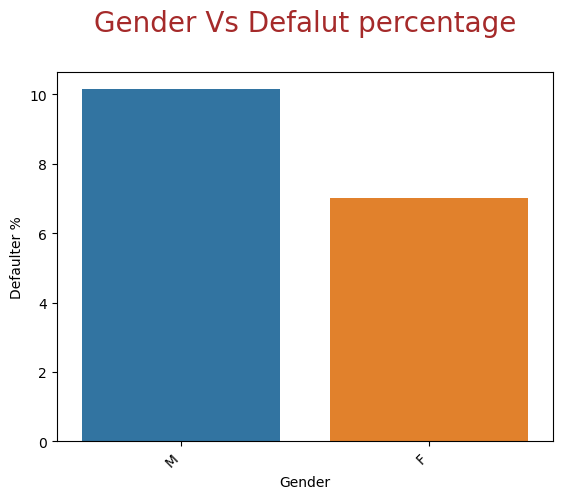

In [88]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'CODE_GENDER'
title = 'Gender Vs Defalut percentage\n'
xlabel = 'Gender'

perc_defaulter(col1, col2, title, xlabel)


- As seen from the above diagram, males have comparatively higher percentage of being defaulters than females.

##### OCCUPATION_TYPE

In [89]:
def univariate_categorical_plot(category1, category2, xlabel):
    plt.figure(figsize=[15, 7])
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)

    plt.subplot(1, 2, 2)
    sns.countplot(x=category2)
    plt.title('Non-Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)

    plt.show()

- Here we can see that in both defaluters and others category, the laborers are the maximum in number. Let's check the percentage of defaulters in each occupation category.

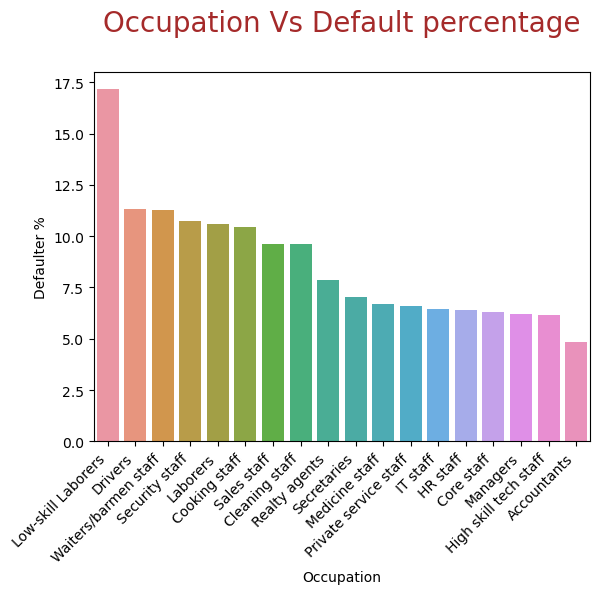

In [90]:

# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'OCCUPATION_TYPE'
title = 'Occupation Vs Default percentage\n'
xlabel = 'Occupation'

perc_defaulter(col1, col2, title, xlabel)

- As we see, low-skill laborers are most likely to default.

##### NAME_INCOME_TYPE

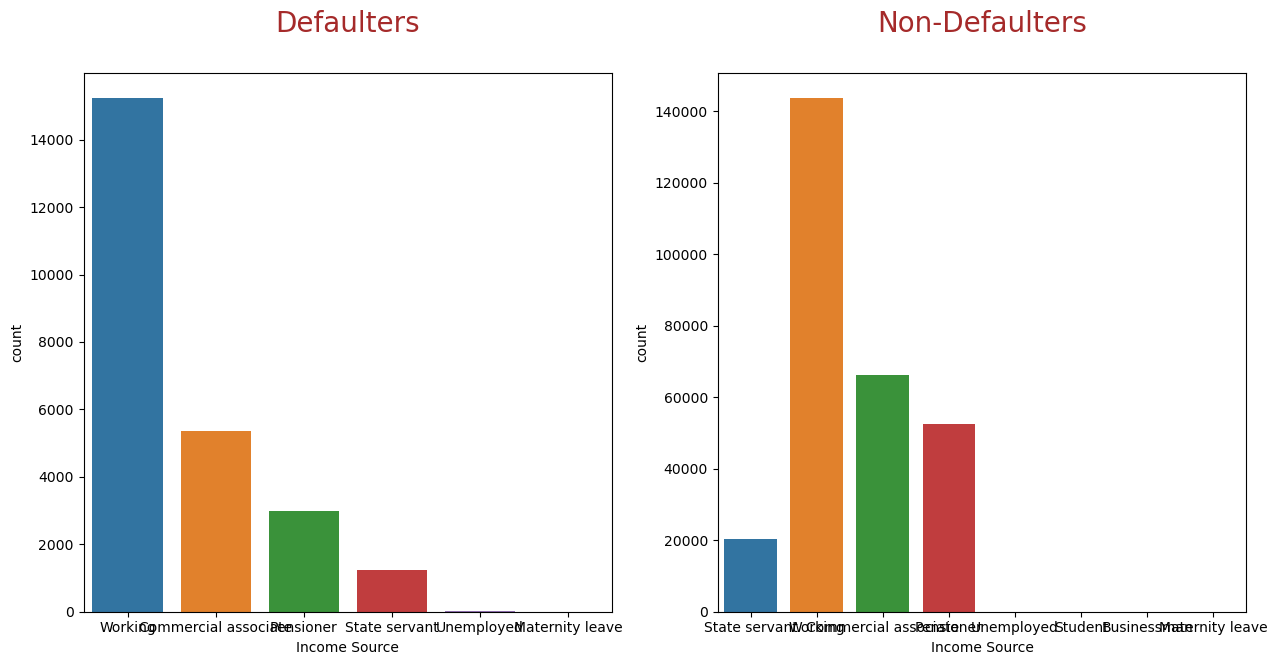

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Call the function with all required arguments
category1 = application_df1['NAME_INCOME_TYPE']
category2 = application_df0['NAME_INCOME_TYPE']
xlabel = 'Income Source'

univariate_categorical_plot(category1, category2, xlabel)

- Here the numbers are high for Working people in both cases. Let's see the % age of defaulters for these categories.

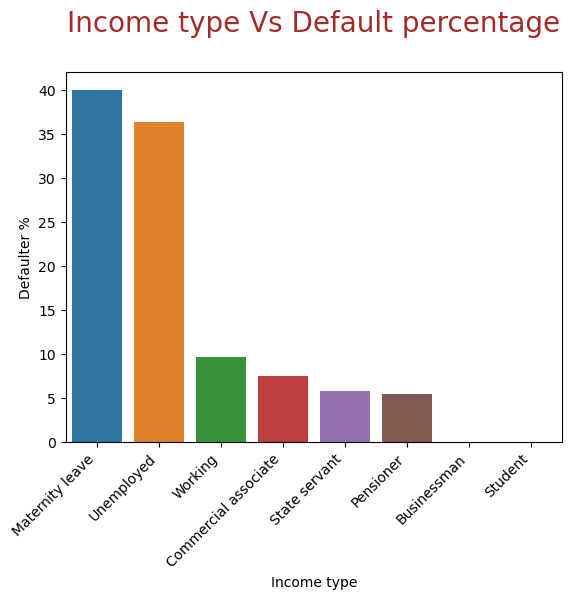

In [93]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_INCOME_TYPE'
title = 'Income type Vs Default percentage\n'
xlabel = 'Income type'

perc_defaulter(col1, col2, title, xlabel)


- The people on Maternity leave and unemployed categories are more likely to fail to repay.
- Businessman and Students have the lowest chances of defaulting.

##### NAME_EDUCATION_TYPE

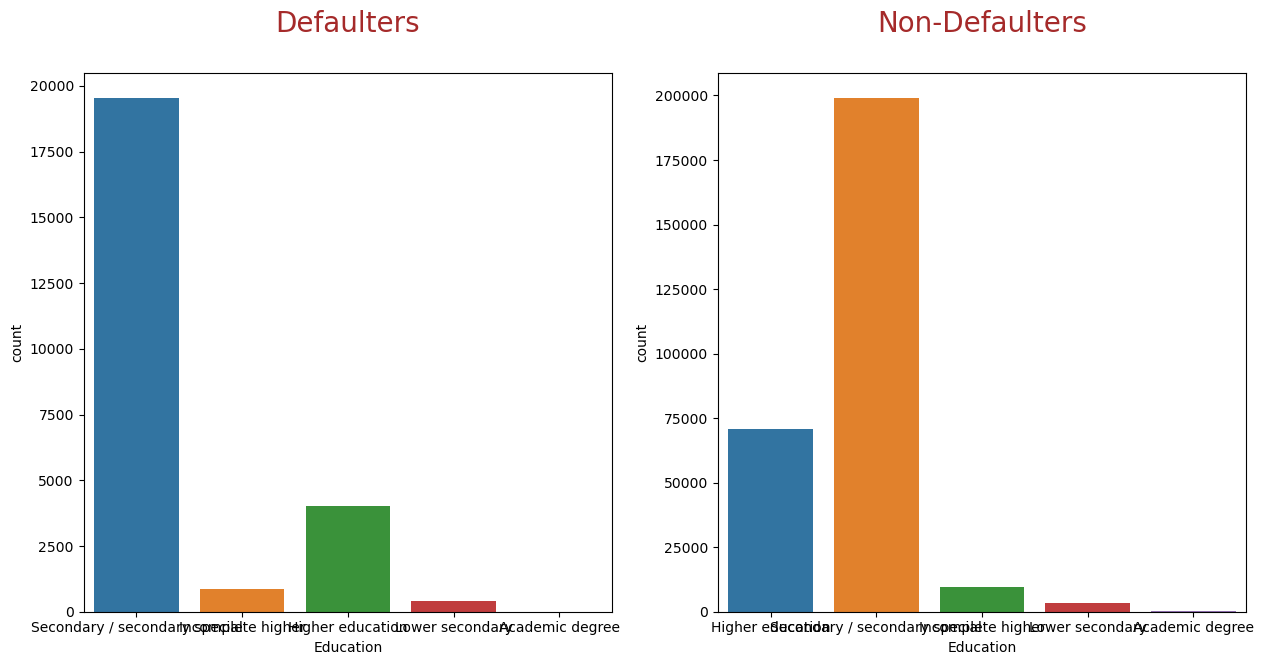

In [94]:
# Analyzing w.r.t Education Type column

category1 = application_df1['NAME_EDUCATION_TYPE']
category2 = application_df0['NAME_EDUCATION_TYPE']
xlabel = 'Education'

univariate_categorical_plot(category1, category2, xlabel)


- People with secondary education level have maximum count in either cases. Let's plot the % age graph.

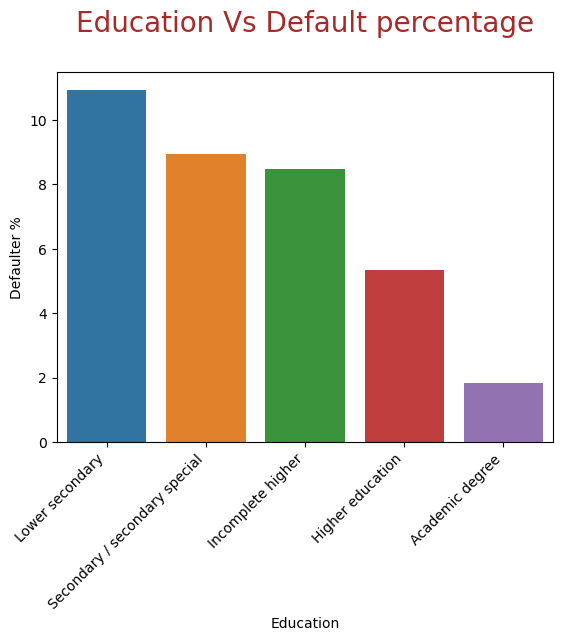

In [96]:
# Plot the percentage of defaulters in each category
col1 = 'TARGET'
col2 = 'NAME_EDUCATION_TYPE'
title = 'Education Vs Default percentage\n'
xlabel = 'Education'

perc_defaulter(col1, col2, title, xlabel)

- People with lower secondary education level are more likely to fail repayment.
- People with academic degree or higher education, however, are mostly able to repay on time.

##### NAME_FAMILY_STATUS

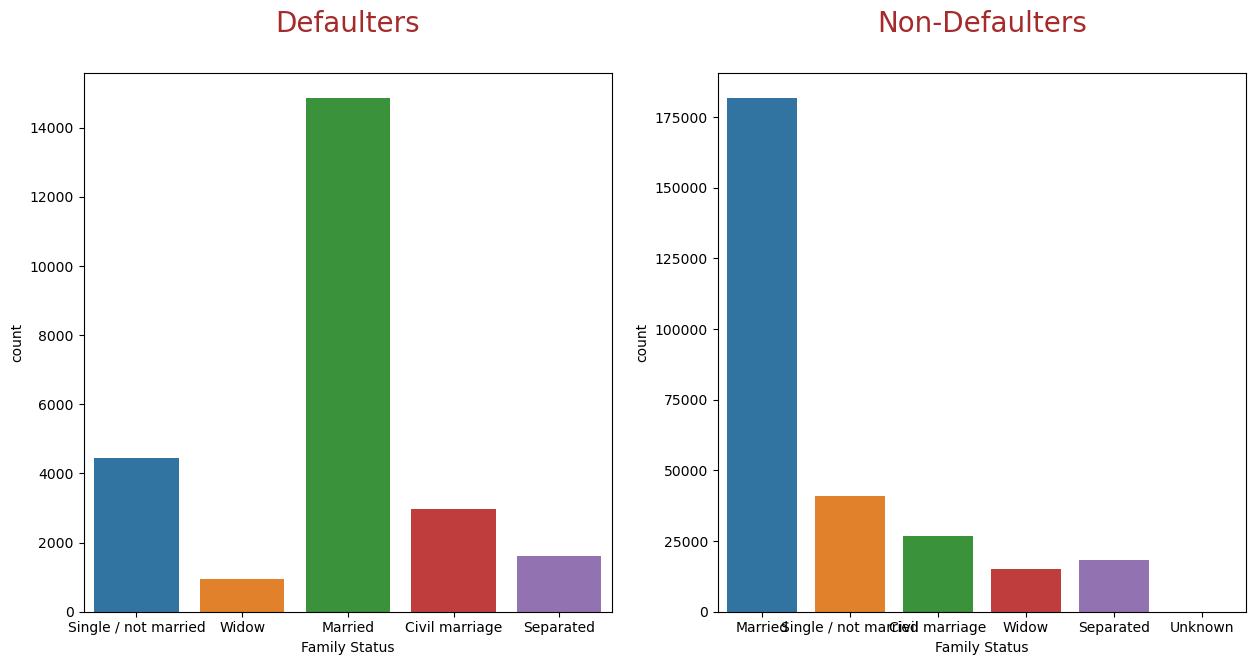

In [97]:
# Analyzing w.r.t Family Status Type column

category1 = application_df1['NAME_FAMILY_STATUS']
category2 = application_df0['NAME_FAMILY_STATUS']
xlabel = 'Family Status'

univariate_categorical_plot(category1, category2, xlabel)

- No. of married applicants are more in both cases.

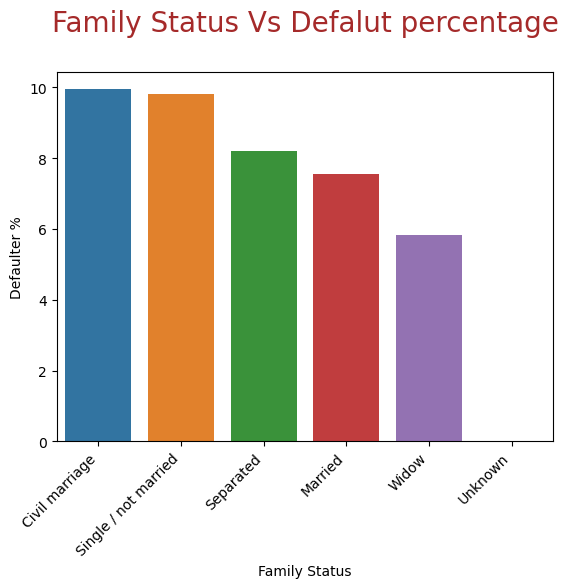

In [98]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_FAMILY_STATUS'
title = 'Family Status Vs Defalut percentage\n'
xlabel = 'Family Status'

perc_defaulter(col1, col2, title, xlabel)


- People in a civil marriage or those who are singles, are more likely to default.

##### NAME_HOUSING_TYPE

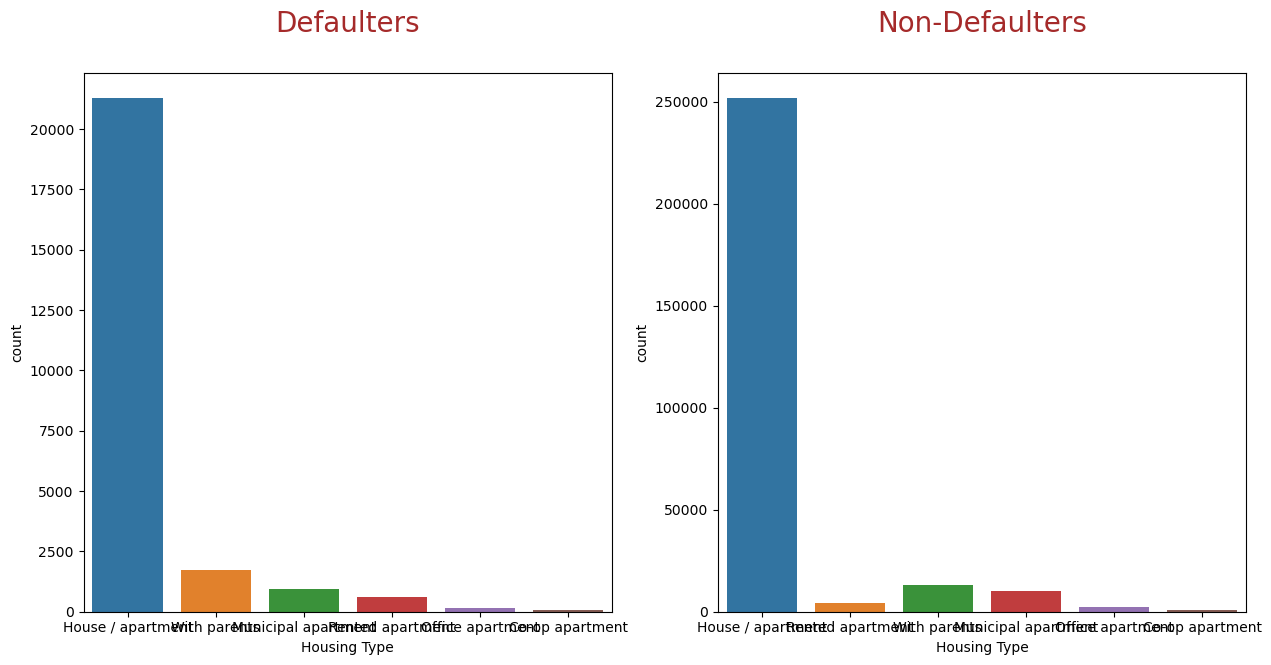

In [99]:
# Analyzing w.r.t Housing Type Type column


category1 = application_df1['NAME_HOUSING_TYPE']
category2 = application_df0['NAME_HOUSING_TYPE']
xlabel = 'Housing Type'

univariate_categorical_plot(category1, category2, xlabel)

- A major count of applicants stay in house/apartment. Very less people stay in office or co-op apartments.

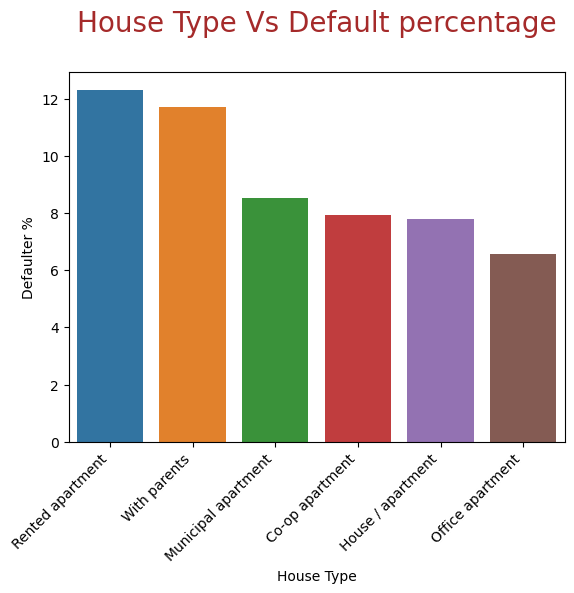

In [125]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_HOUSING_TYPE'
title = 'House Type Vs Default percentage\n'
xlabel = 'House Type'

perc_defaulter(col1, col2, title, xlabel)

- Most of the applicants who are likely to default are either staying in a rented apartment or with parents compared to other housing types.

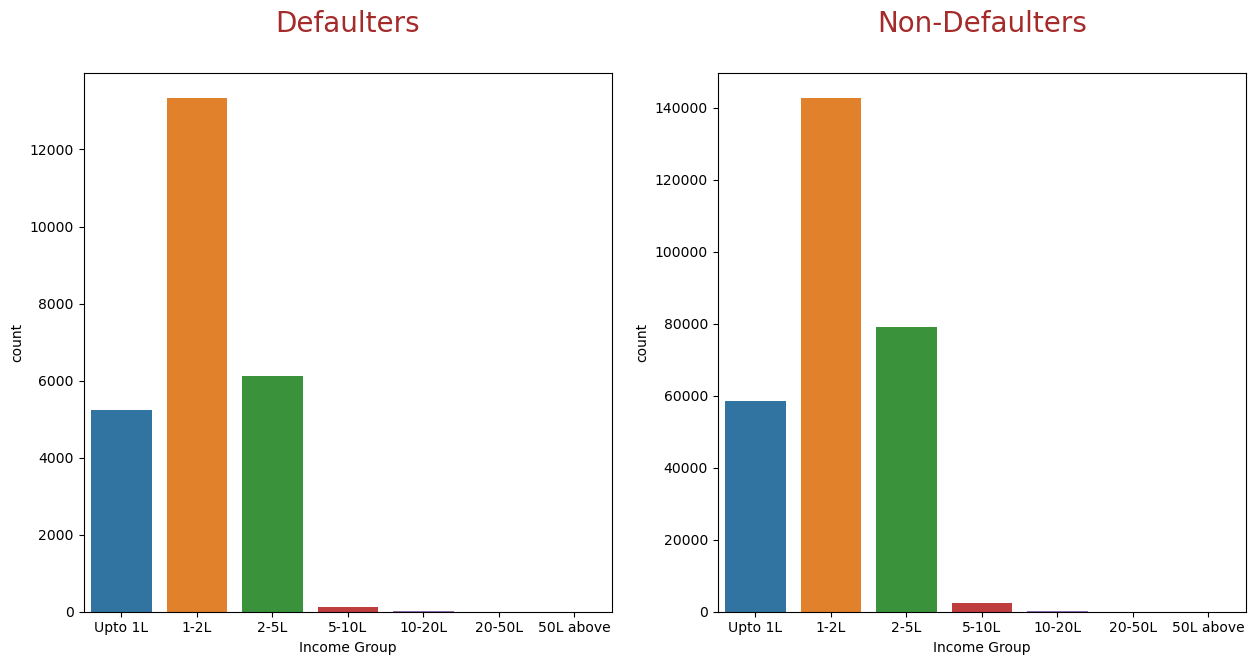

In [101]:
# Analyzing w.r.t Income Group column

category1 = application_df1['INCOME_GROUP']
category2 = application_df0['INCOME_GROUP']
xlabel = 'Income Group'

univariate_categorical_plot(category1, category2, xlabel)


- Most of the loan applicants with an income range 1-2 lakhs are most likely to default.

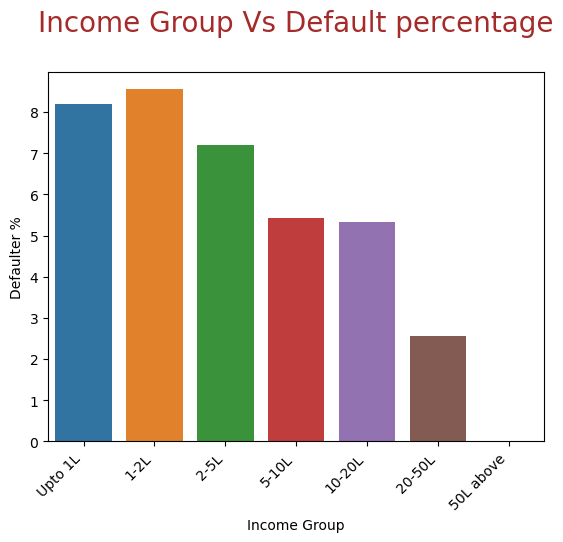

In [124]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'INCOME_GROUP'
title = 'Income Group Vs Default percentage\n'
xlabel = 'Income Group'

perc_defaulter(col1, col2, title, xlabel)

- Lower the income group higher than chance of defaulting.
- Maximum defaulting income group is 1-2 Lakhs

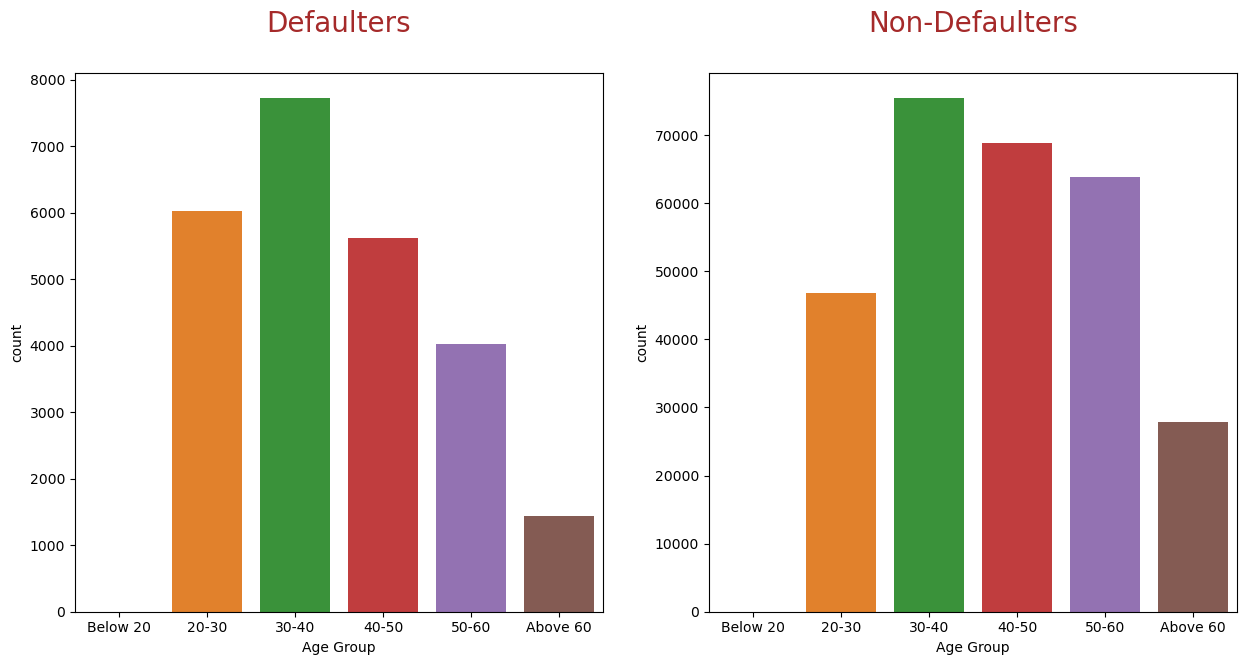

In [103]:
# Analyzing w.r.t Income Group column

category1 = application_df1['AGE_GROUP']
category2 = application_df0['AGE_GROUP']
xlabel = 'Age Group'

univariate_categorical_plot(category1, category2, xlabel)

- From these plots it seems people in the age range 30-40 are more likely to default.

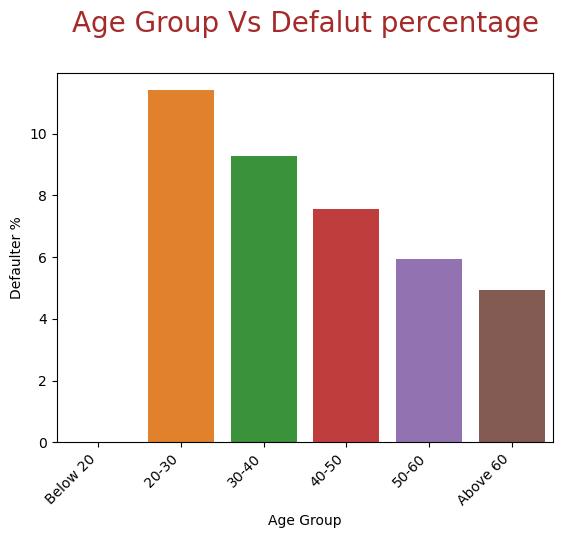

In [104]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'AGE_GROUP'
title = 'Age Group Vs Defalut percentage\n'
xlabel = 'Age Group'

perc_defaulter(col1, col2, title, xlabel)

- However, this plot says, the percentage of loan default is highest in the age group 20-30. 
- The loan default percentage decreases with increase in age.

##### Numeric variable Analysis

Here we are going to consider the below numeric columns and draw are conclusion on them.

- AMT_INCOME_TOTAL
- AMT_CREDIT 
- AMT_ANNUITY 
- AMT_GOODS_PRICE
- CNT_CHILDREN 
- DAYS_BIRTH

In [105]:
# Defining a function to plot univariate numerical columns

def univariate_numerical_plots(col1, col2, title, xlabel):
    sns.distplot(col1 , hist=False, label='Defaulters')
    sns.distplot(col2 , hist=False, label='Others')
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

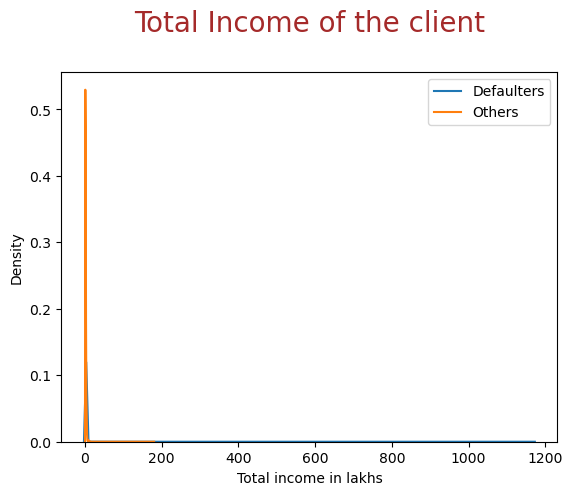

In [106]:
# Plotting AMT_INCOME_TOTAL 

col1 = application_df1['AMT_INCOME_TOTAL']/100000
col2 = application_df0['AMT_INCOME_TOTAL']/100000
title = 'Total Income of the client\n'
xlabel = 'Total income in lakhs'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the applicants are in low income range.

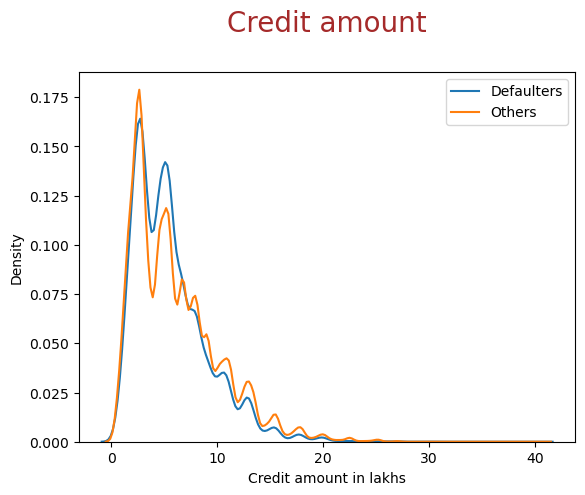

In [107]:
# Plotting AMT_CREDIT 

col1 = application_df1['AMT_CREDIT']/100000
col2 = application_df0['AMT_CREDIT']/100000
title = 'Credit amount\n'
xlabel = 'Credit amount in lakhs'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the loans are given with credit amount less than 10 lakhs.

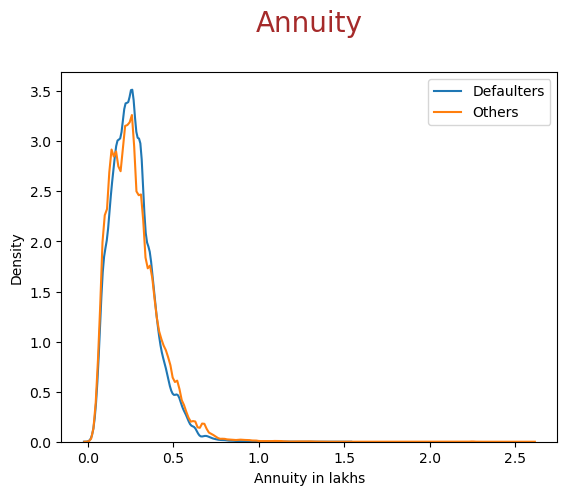

In [108]:
# Plotting AMT_ANNUITY 

col1 = application_df1['AMT_ANNUITY']/100000
col2 = application_df0['AMT_ANNUITY']/100000
title = 'Annuity\n'
xlabel = 'Annuity in lakhs'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the loan annuity is less than 75, 000.

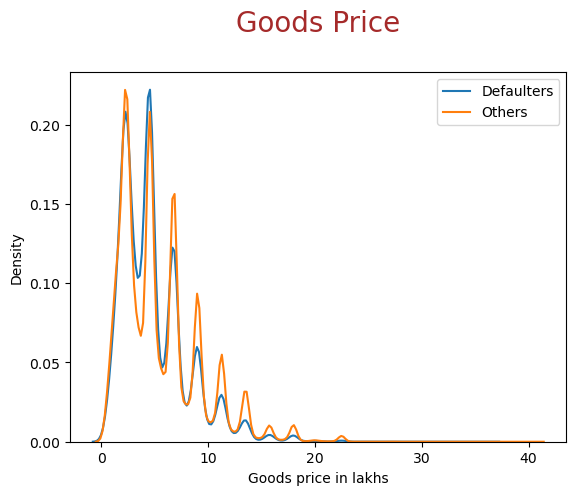

In [109]:
# Plotting AMT_GOODS_PRICE 

col1 = application_df1['AMT_GOODS_PRICE']/100000
col2 = application_df0['AMT_GOODS_PRICE']/100000
title = 'Goods Price\n'
xlabel = 'Goods price in lakhs'

univariate_numerical_plots(col1, col2, title, xlabel)


- Goods amount price is mostly less than 15 lakhs.

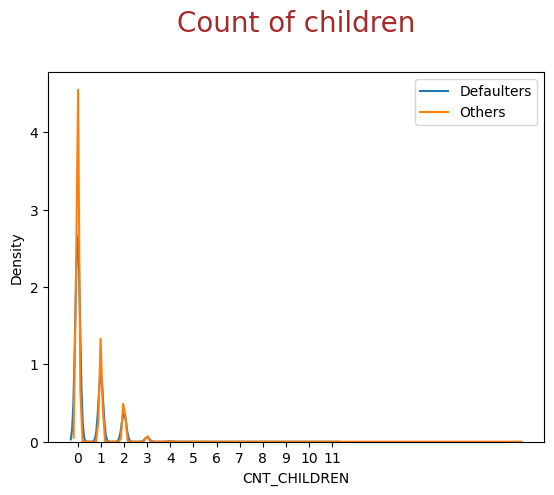

In [110]:
# Plotting CNT_CHILDREN 

sns.distplot(application_df1['CNT_CHILDREN'],hist=False, label='Defaulters')
sns.distplot(application_df0['CNT_CHILDREN'],hist=False, label='Others')
xlabel = 'Children'
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(ticks)
plt.legend()
plt.title('Count of children\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- Majority of the applicants are having no children. Mostly they have 3 or less children.

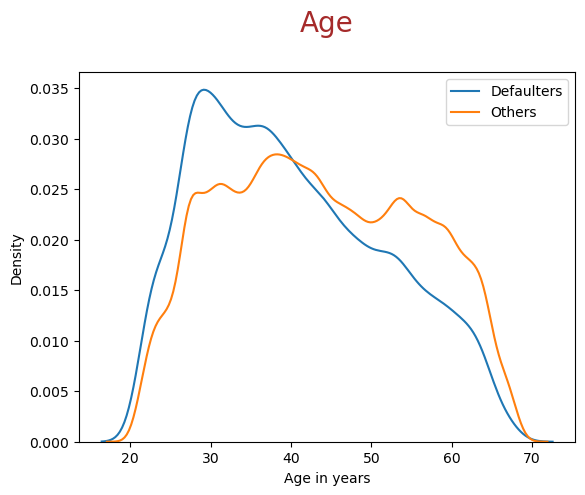

In [111]:
# Plotting DAYS_BIRTH 

col1 = application_df1['DAYS_BIRTH']//365
col2 = application_df0['DAYS_BIRTH']//365
title = 'Age\n'
xlabel = 'Age in years'

univariate_numerical_plots(col1, col2, title, xlabel)


- Defaulters are more in 25-40 age group. Above 40, the number of defaulters tends to decrease.

#### 2.4.4	Correlation

In [112]:
corr_df1 = application_df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.038131     0.046421         0.037583   
AMT_CREDIT                0.038131    1.000000     0.752195         0.983103   
AMT_ANNUITY               0.046421    0.752195     1.000000         0.752699   
AMT_GOODS_PRICE           0.037583    0.983103     0.752699         1.000000   
DAYS_BIRTH               -0.003096    0.135316     0.014303         0.135810   
DAYS_EMPLOYED            -0.014977    0.001930    -0.081207         0.006642   
CNT_CHILDREN              0.004796   -0.001675     0.031257        -0.008112   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.003096      -0.014977      0.004796  
AMT_CREDIT          0.135316       0.001930     -0.001675  
AMT_ANNUITY         0.014303      -0.081207      0.031257  
AMT_GOODS_PRICE     0.135810       0.006642     -0.008112  
DAYS_BIRTH          1.000000       0.582185     -0.259109  
DAYS_EMPLOYED       0.582185       1.000000     -0.192864  
CNT_CHILDREN       -0.259109      -0.192864      1.000000

In [113]:
corr_df0 = application_df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.342799     0.418953         0.349462   
AMT_CREDIT                0.342799    1.000000     0.771309         0.987250   
AMT_ANNUITY               0.418953    0.771309     1.000000         0.776686   
AMT_GOODS_PRICE           0.349462    0.987250     0.776686         1.000000   
DAYS_BIRTH               -0.062609    0.047378    -0.012263         0.044565   
DAYS_EMPLOYED            -0.140392   -0.070104    -0.104978        -0.068609   
CNT_CHILDREN              0.027397    0.003081     0.020905        -0.000525   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.062609      -0.140392      0.027397  
AMT_CREDIT          0.047378      -0.070104      0.003081  
AMT_ANNUITY        -0.012263      -0.104978      0.020905  
AMT_GOODS_PRICE     0.044565      -0.068609     -0.000525  
DAYS_BIRTH          1.000000       0.626114     -0.336966  
DAYS_EMPLOYED       0.626114       1.000000     -0.245174  
CNT_CHILDREN       -0.336966      -0.245174      1.000000

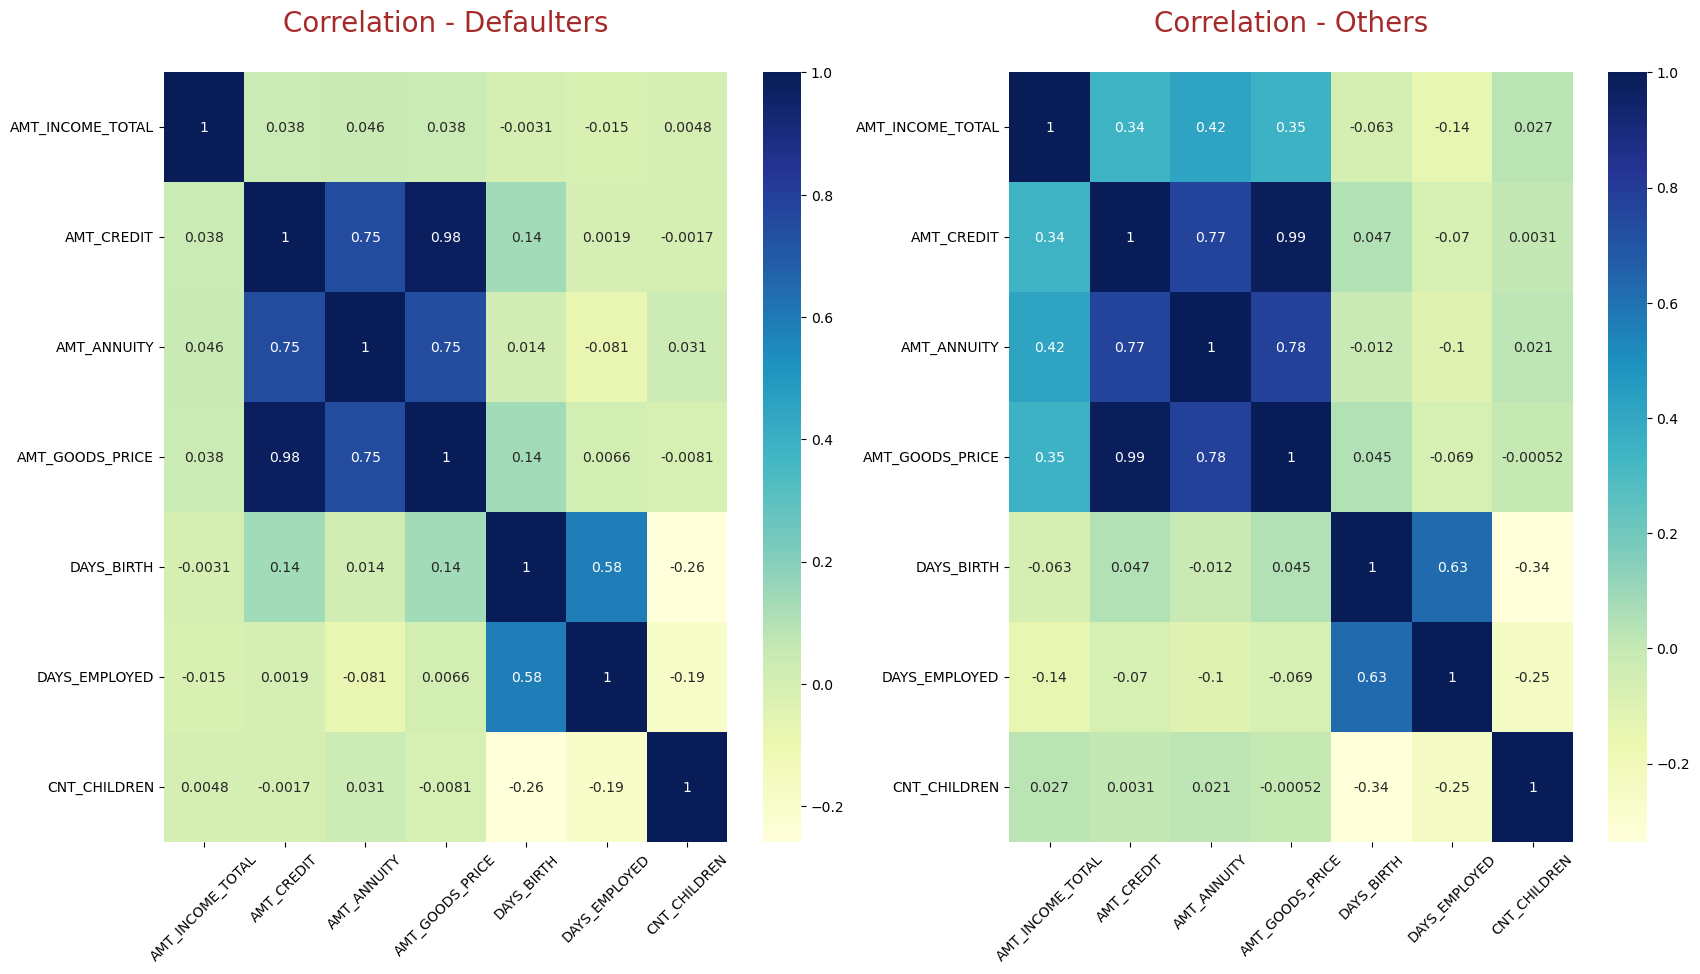

In [114]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.heatmap(corr_df1, cmap="YlGnBu", annot = True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.heatmap(corr_df0, cmap="YlGnBu", annot = True)
plt.title('Correlation - Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.show()

- AMT_CREDIT is strongly correlated to AMT_ANNUITY and AMT_GOODS_PRICE in both cases

#### Bivariate Analysis

We will perform 3 types of bivariate analysis to understand the data better and draw some important insights.

- Categorical - Categorical Analysis
- Categorical - Continuous Analysis
- Continuous - Continuous Analysis

##### Categorical - Categorical Analysis

Columns considered -

- NAME_CONTRACT_TYPE - CODE_GENDER
- NAME_INCOME_TYPE - NAME_CONTRACT_TYPE
- INCOME_GROUP - CODE_GENDER
- CODE_GENDER - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

In [122]:
# Defining function for categorical - categorical variable plotting

def cat_cat_plot(var1, var2, label, legend):
    plt.figure(figsize=[15, 7])
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=var1, hue=var2, data=application_df1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(label)
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=var1, hue=var2, data=application_df0)
    plt.title('Non-Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(label)
    plt.xticks(rotation=45)

    plt.show()

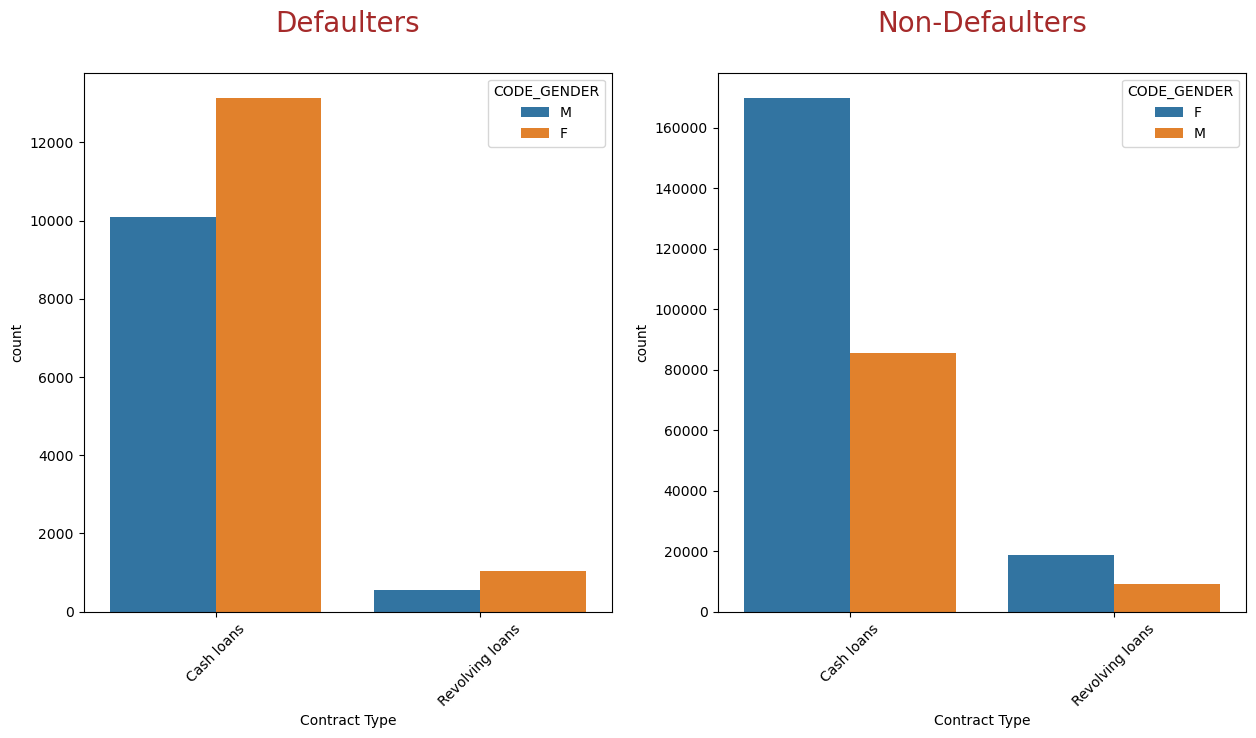

In [127]:
# NAME_CONTRACT_TYPE - CODE_GENDER

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'CODE_GENDER'
label = 'Contract Type'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)

- Most of the applications have applied for cash loans.
- Female applicants are more than males.


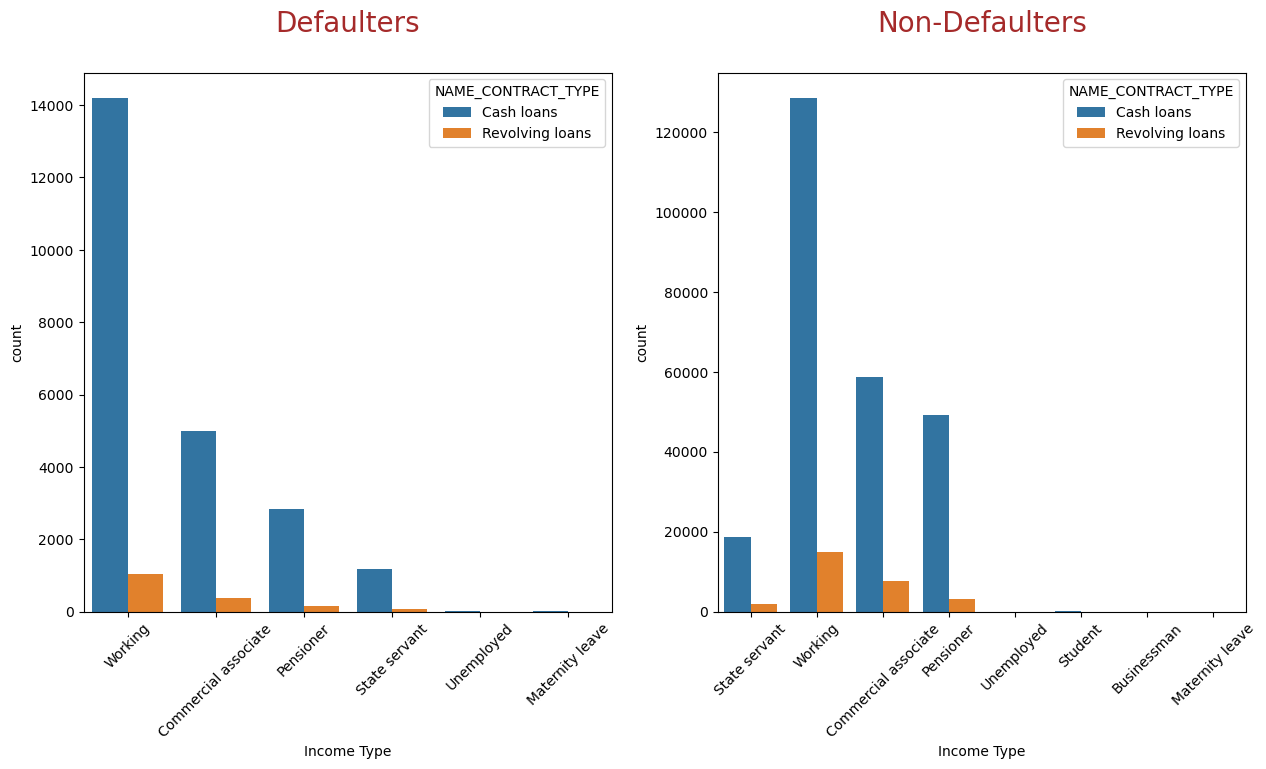

In [128]:
# NAME_INCOME_TYPE - NAME_CONTRACT_TYPE

var1 = 'NAME_INCOME_TYPE'
var2 = 'NAME_CONTRACT_TYPE'
label = 'Income Type'
legend = 'Contract type'

cat_cat_plot(var1, var2, label, legend)

- Across income types, cash loan seems to be the popular contract type.
- Most of the people who have taken loans are working class and they have taken cash loans mostly compared to revolving loans.
- People who have taken cash loans are likely to default as well

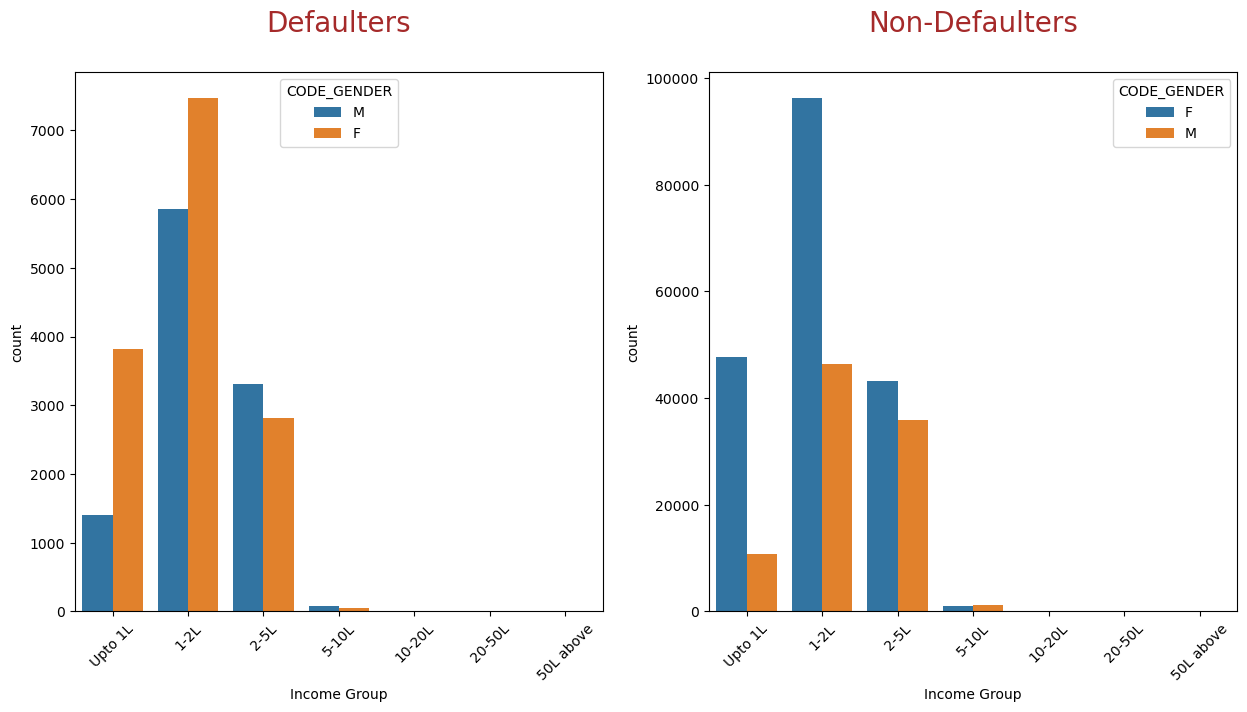

In [129]:
# INCOME_GROUP - CODE_GENDER

var1 = 'INCOME_GROUP'
var2 = 'CODE_GENDER'
label = 'Income Group'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)

- Females have done timely repayment than that of males.

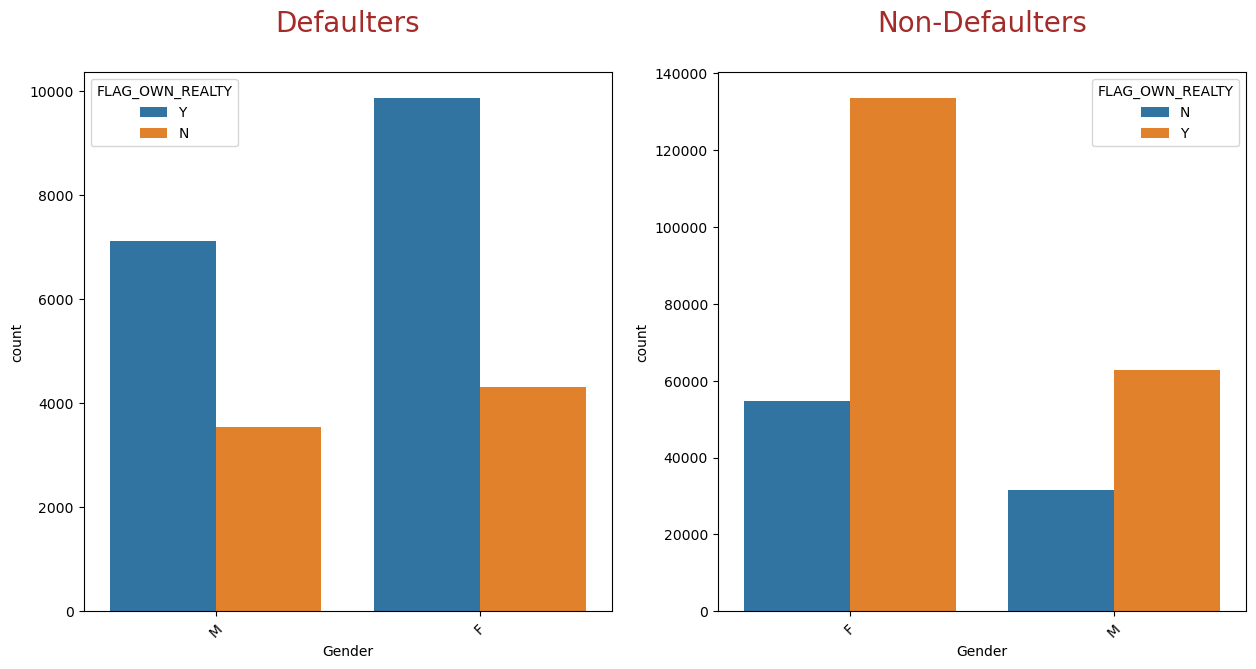

In [130]:
# CODE_GENDER - FLAG_OWN_REALTY

var1 = 'CODE_GENDER'
var2 = 'FLAG_OWN_REALTY'
label = 'Gender'
legend = 'Own house?'

cat_cat_plot(var1, var2, label, legend)

- Female borrowers are more likely to own flat/house.
- Since the female count is higher in both cases , we cannot be sure that they are likely to default.

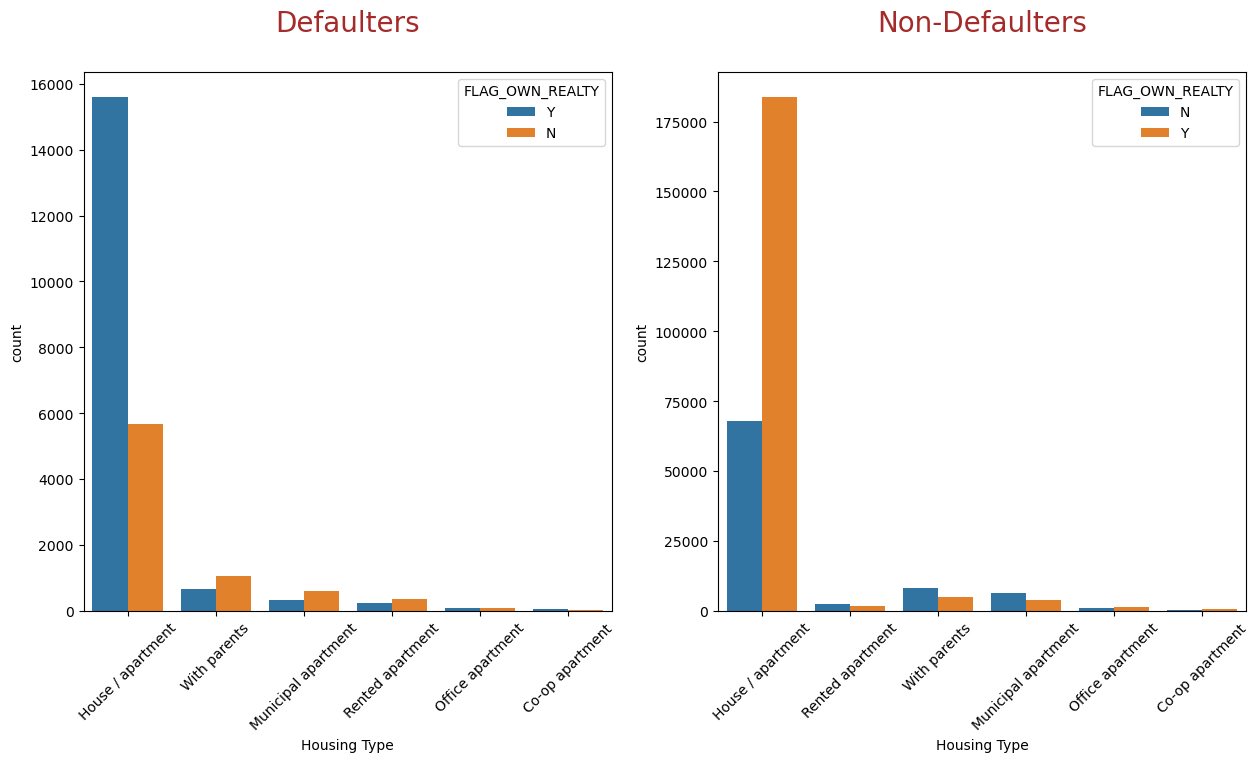

In [131]:
# NAME_HOUSING_TYPE - FLAG_OWN_REALTY

var1 = 'NAME_HOUSING_TYPE'
var2 = 'FLAG_OWN_REALTY'
label = 'Housing Type'
legend = 'Own house?'

cat_cat_plot(var1, var2, label, legend)

- People who own a house/flat and are staying in own property are likely to make repayments.


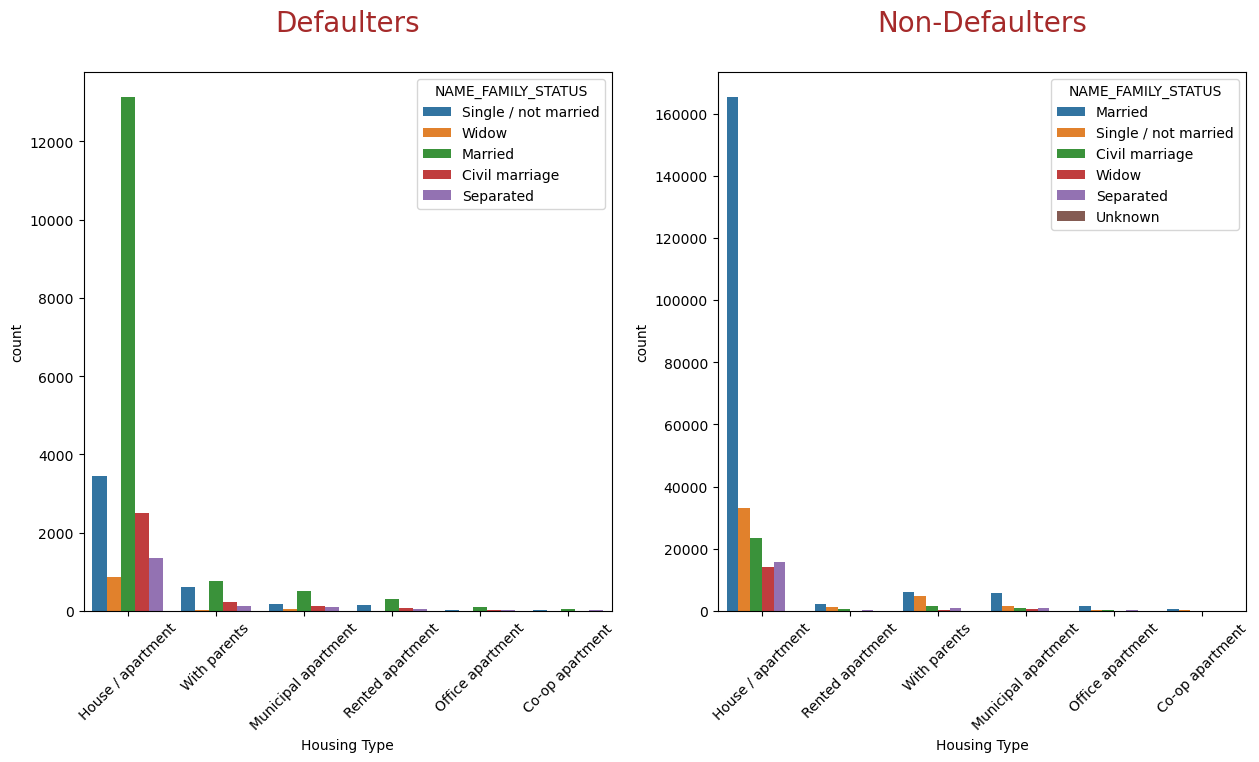

In [132]:
# NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

var1 = 'NAME_HOUSING_TYPE'
var2 = 'NAME_FAMILY_STATUS'
label = 'Housing Type'
legend = 'Family Status'

cat_cat_plot(var1, var2, label, legend)

- Married loan applicants are mostly staying in house/apartment.
- Married people staying in house/apartments are the group with maximum number of loan applications.
- Single and civil marriage applicants are more likely to default.


##### Categorical - Continuous Analysis

Columns considered -

- NAME_CONTRACT_TYPE - AMT_CREDIT
- NAME_INCOME_TYPE - AMT_CREDIT
- NAME_EDUCATION_TYPE - AMT_ANNUITY
- NAME_HOUSING_TYPE - AMT_CREDIT
- OCCUPATION_TYPE - AMT_CREDIT

In [133]:
# Defining function for categorical - Continuous variable plotting

def cat_cont_plot(var1, var2, xlabel, ylabel):
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

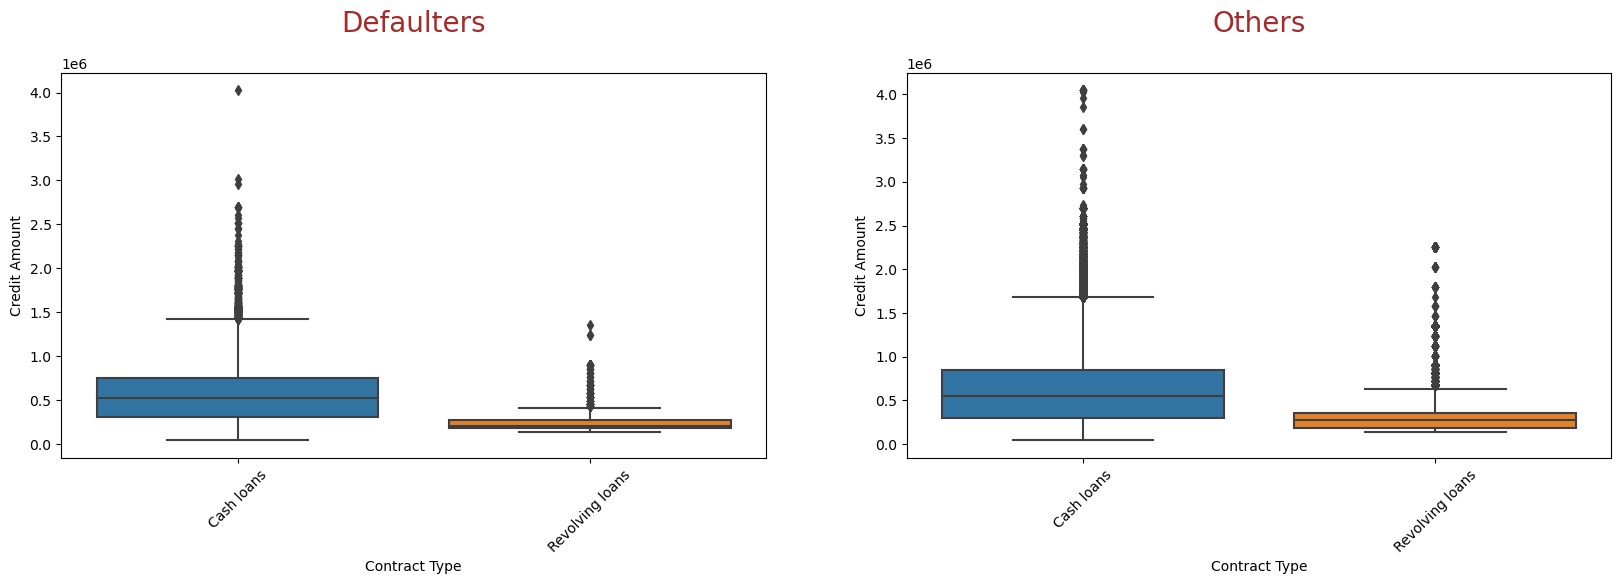

In [134]:
# NAME_CONTRACT_TYPE - AMT_CREDIT

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'AMT_CREDIT'

xlabel = 'Contract Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan credit amount for cash loan is higher than that of revolving loans.
- Cash loan is favourite among all genders.

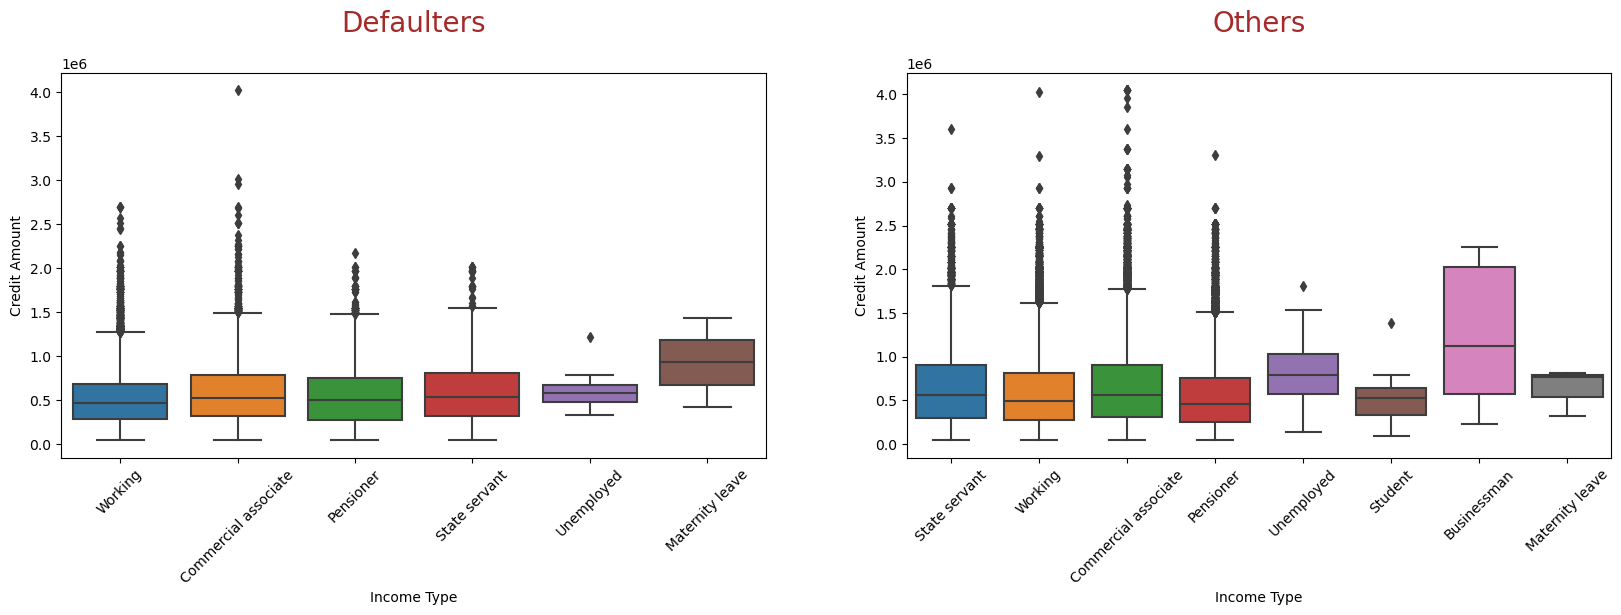

In [135]:
# NAME_INCOME_TYPE - AMT_CREDIT

var1 = 'NAME_INCOME_TYPE'
var2 = 'AMT_CREDIT'

xlabel = 'Income Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan amount taken by businessman is higher compared to the other income types.
- The median value of credit amount is some what similar for working, commercial associate, state servant and pensioner income type.
- People with maternity leave income type tend to default with higher credit amount.

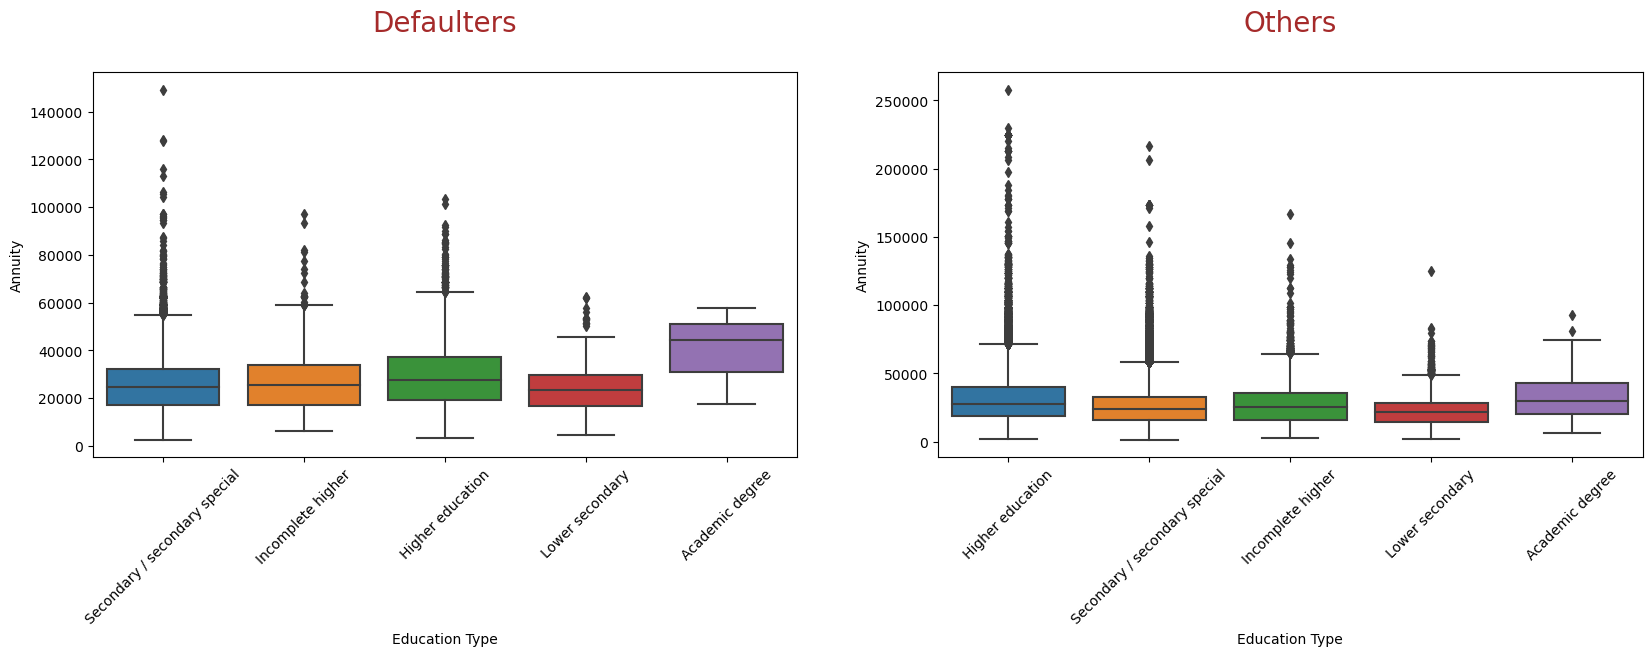

In [136]:
# NAME_EDUCATION_TYPE - AMT_ANNUITY

var1 = 'NAME_EDUCATION_TYPE'
var2 = 'AMT_ANNUITY'
xlabel = 'Education Type'
ylabel = 'Annuity'

cat_cont_plot(var1, var2, xlabel, ylabel)

- People having academic degree and higher education have more loan annuity amount compared to the other groups in both the default and non-default section.

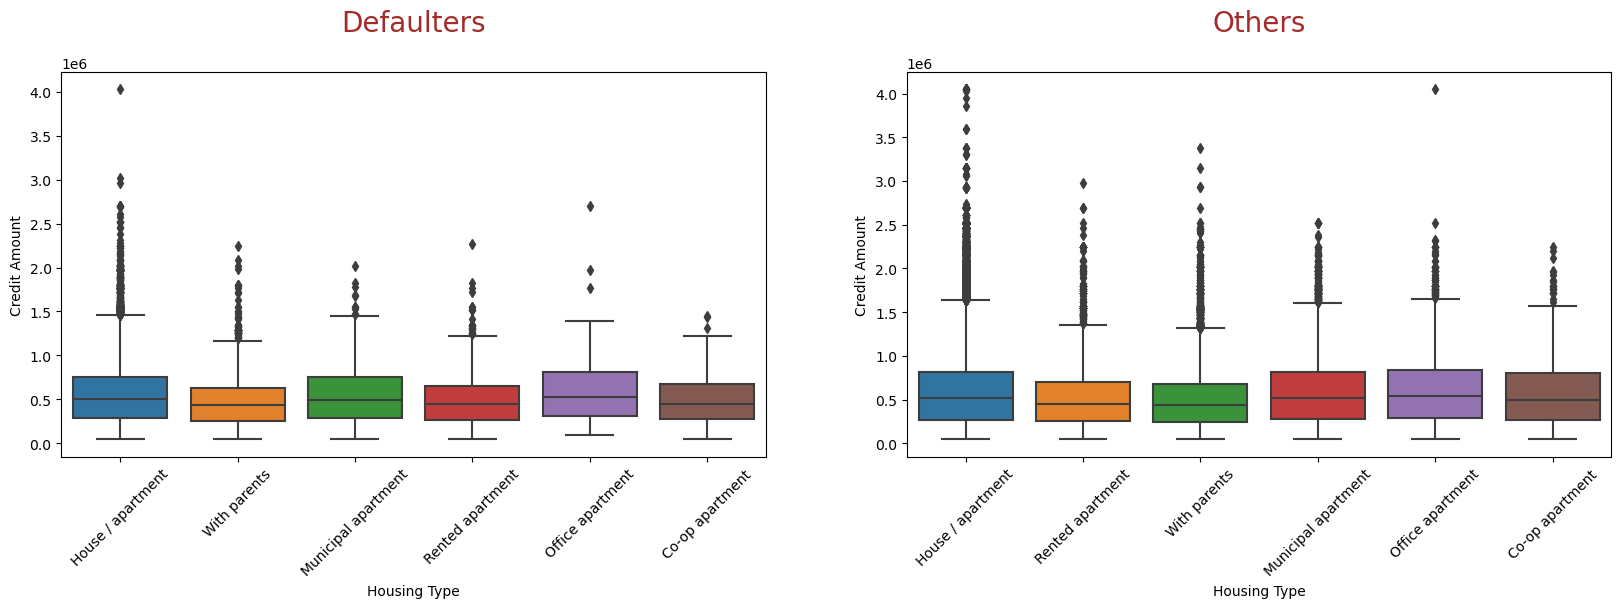

In [137]:
# NAME_HOUSING_TYPE - AMT_CREDIT

var1 = 'NAME_HOUSING_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Housing Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan credit amount is comparatively higher for people living in houses/appartments, municipal and office apartments.

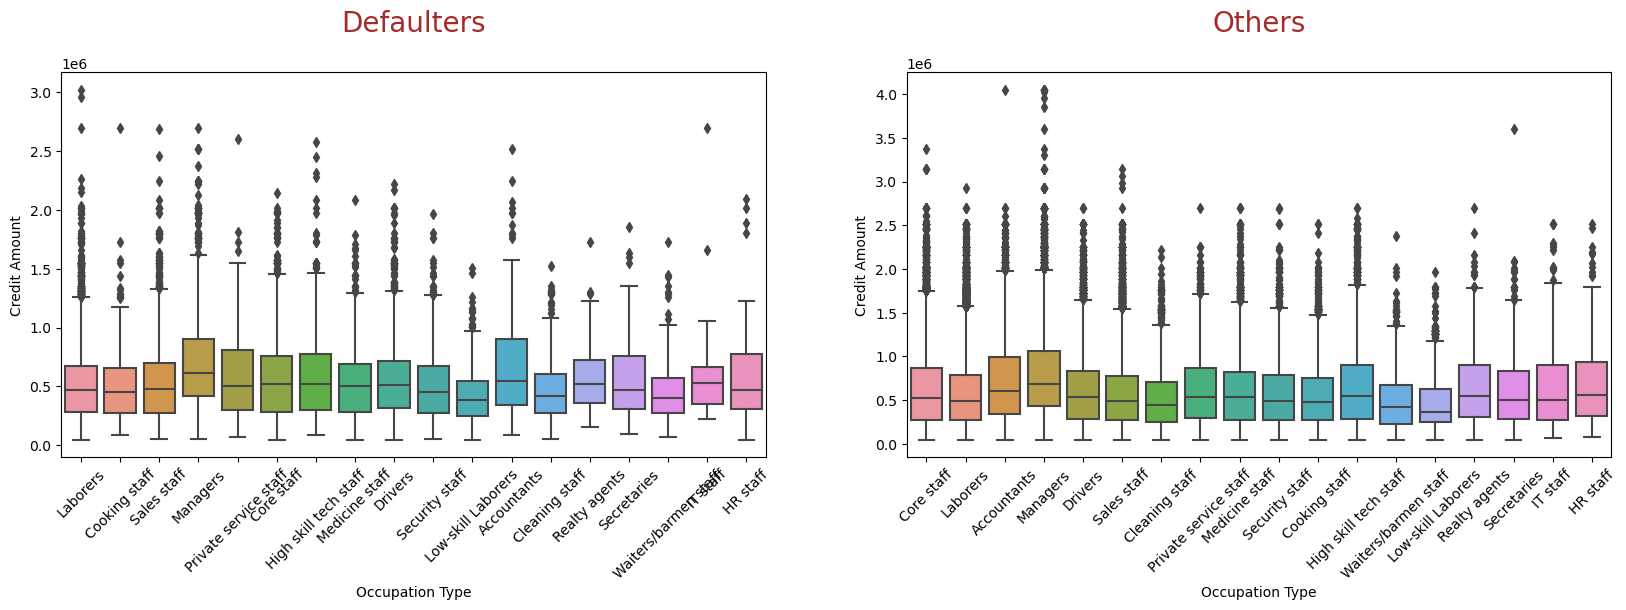

In [138]:
# OCCUPATION_TYPE - AMT_CREDIT

var1 = 'OCCUPATION_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Occupation Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Managers and Accountants have comparatively higher credit amount.

##### Continuous - Continuous Analysis

Here we have considered the below continuous value columns for plotting the graphs -

- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL

In [139]:
# Defining function for Continuous - continuous plot

def cont_cont_plot(col1, col2, xlabel, ylabel):
    
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

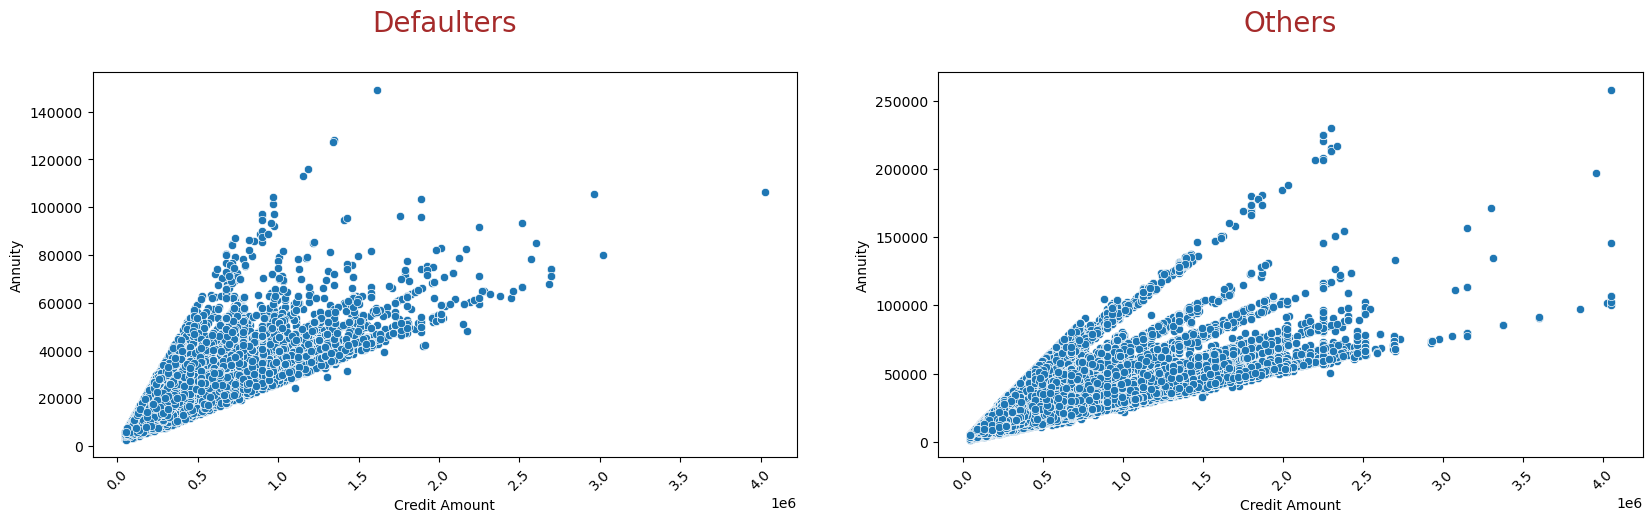

In [140]:
# AMT_CREDIT-AMT_ANNUITY

col1 = 'AMT_CREDIT'
col2 = 'AMT_ANNUITY'
xlabel = 'Credit Amount'
ylabel = 'Annuity'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT are AMT_ANNUITY seems to be correlated.

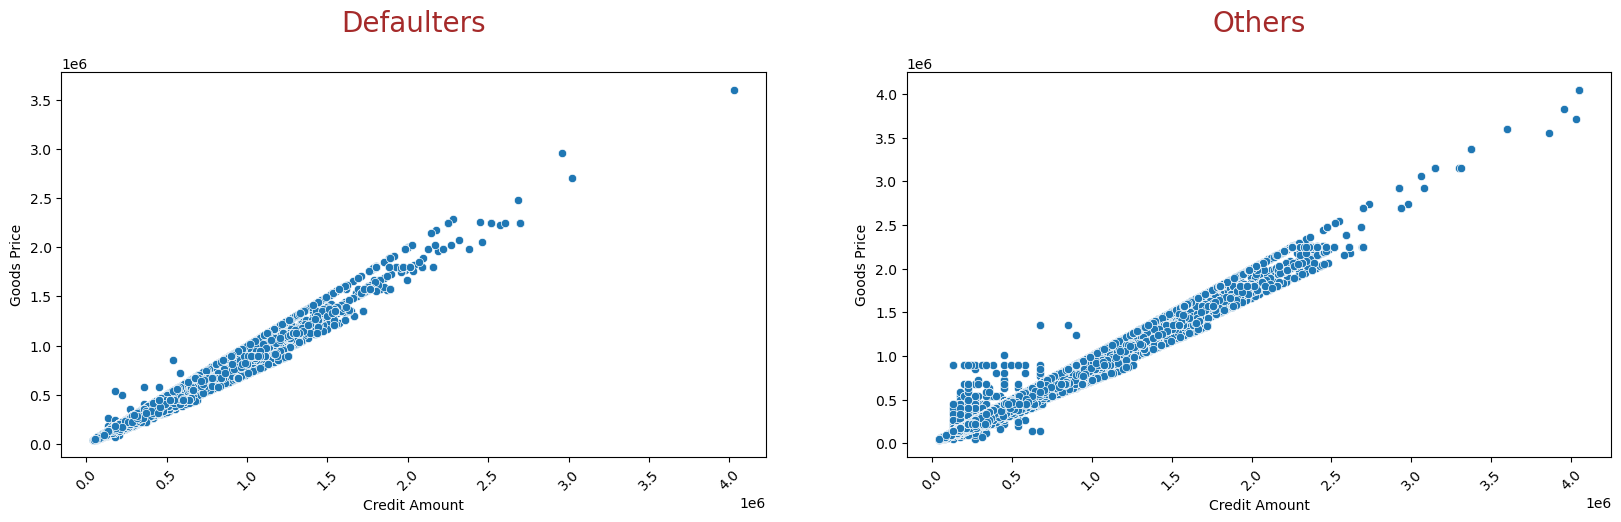

In [141]:
# AMT_CREDIT-AMT_GOODS_PRICE

col1 = 'AMT_CREDIT'
col2 = 'AMT_GOODS_PRICE'
xlabel = 'Credit Amount'
ylabel = 'Goods Price'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT are AMT_GOODS_PRICE seems to be correlated.

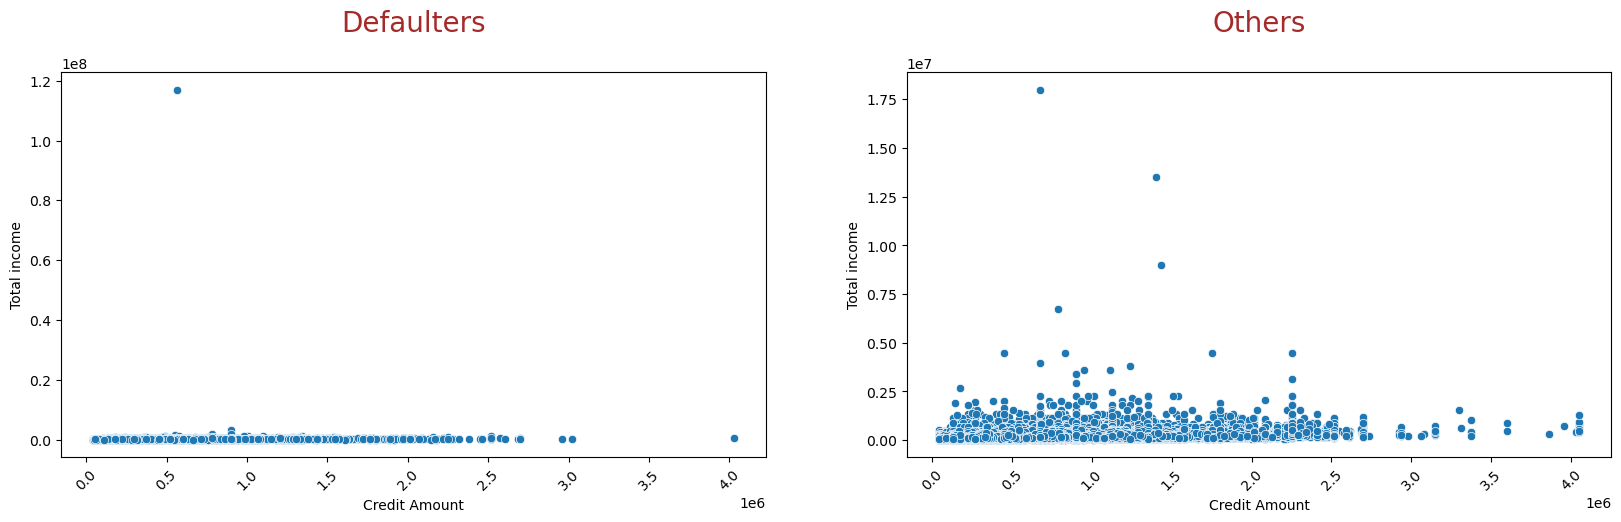

In [142]:
# AMT_CREDIT-AMT_INCOME_TOTAL

col1 = 'AMT_CREDIT'
col2 = 'AMT_INCOME_TOTAL'
xlabel = 'Credit Amount'
ylabel = 'Total income'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT and AMT_INCOME_TOTAL does not seem to be correlated.

-------

## PREVIOUS LOAN APPLICATION DATA

We also have the previous application histories of the applicants. Let's explore that and see if we could find any trend.

### Check the Previous Data

In [143]:
# Read the previous data file

previous_df = pd.read_csv('previous_application.csv')
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [144]:
# Check the number of rows and columns in the dataframe
previous_df.shape

(1670214, 37)

In [145]:
# Check the column-wise info of the dataframe
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [146]:
# Check the summary for the numeric columns
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Data Cleaning & Imputation

In [147]:
# Check for missing values in percentage 

round(100 * previous_df.isnull().mean(),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [150]:
# Extract the column names with more than 50% data missing and their respective missing value percentage

missing_percentage = round(100 * previous_df.isnull().sum() / len(previous_df.index), 2)
missing50 = [(col, percent) for col, percent in missing_percentage.items() if percent > 50]

# Extract the column names from the above list

cols_to_drop = [col for col, _ in missing50]
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [151]:
# Remove the columns with more than 50% missing values

previous_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape 

previous_df.shape

(1670214, 33)

In [152]:
# Check the missing values for remaining
round(100 * previous_df.isnull().mean(),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [153]:
# Check the summary for NFLAG_INSURED_ON_APPROVAL

previous_df['NFLAG_INSURED_ON_APPROVAL'].describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

Suggestions-

- NAME_TYPE_SUITE can also be dropped since the missing percentage is close to 50 
- NFLAG_INSURED_ON_APPROVAL - Since this is a flag that shows whether the client requested insurance during the previous application the value can either be 0 or 1. However, this column has 40% data missing. So, it would be safe to drop this column as well.


### Data Standardization

- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, DAYS_DECISION - These columns seem to have some negative values. We must convert that to absolute value.

In [154]:
previous_df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  DAYS_DECISION  
count  997149.000000     997149.000000   1.670214e+06  
mean    76582.403064      81992.343838  -8.806797e+02  
std    149647.415123     153303.516729   7.790997e+02  
min     -2889.000000      -2874.000000  -2.922000e+03  
25%     -1314.000000      -1270.000000  -1.300000e+03  
50%      -537.000000       -499.000000  -5.810000e+02  
75%       -74.000000        -44.000000  -2.800000e+02  
max    365243.000000     365243.000000  -1.000000e+00

In [155]:
# Create a column list for DAYS columns

col_list = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']

# Replace the values with their respective absolute values
for col in col_list:
    previous_df[col] = abs(previous_df[col])
    
# Verify the changes
previous_df[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342340.056543    15949.224065               35163.363265   
std          88413.495220    72007.270877              106405.950190   
min              2.000000        2.000000                   0.000000   
25%         365243.000000      475.000000                 257.000000   
50%         365243.000000      921.000000                 741.000000   
75%         365243.000000     1825.000000                1735.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  DAYS_DECISION  
count  997149.000000     997149.000000   1.670214e+06  
mean    78152.730207      83505.775017   8.806797e+02  
std    148833.342466     152484.418802   7.790997e+02  
min         2.000000          2.000000   1.000000e+00  
25%       455.000000        447.000000   2.800000e+02  
50%      1155.000000       1171.000000   5.810000e+02  
75%      2418.000000       2501.000000   1.300000e+03  
max    365243.000000     365243.000000   2.922000e+03

### Outlier Analysis

- For the columns AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT , let's plot outliers for better understanding.

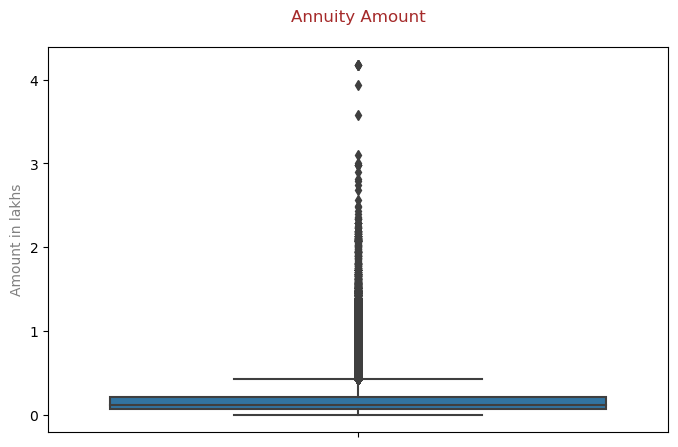

In [156]:
# Box plot AMT_ANNUITY

var = previous_df['AMT_ANNUITY']/100000
title = 'Annuity Amount\n'
label = 'Amount in lakhs'

outlier_plot(var,title,label)

- Annuity seems to have some higher data points.

In [157]:
# Check Summary

previous_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [158]:
# Check the quantiles

previous_df['AMT_ANNUITY'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

- The outliers can be capped at 0.99 

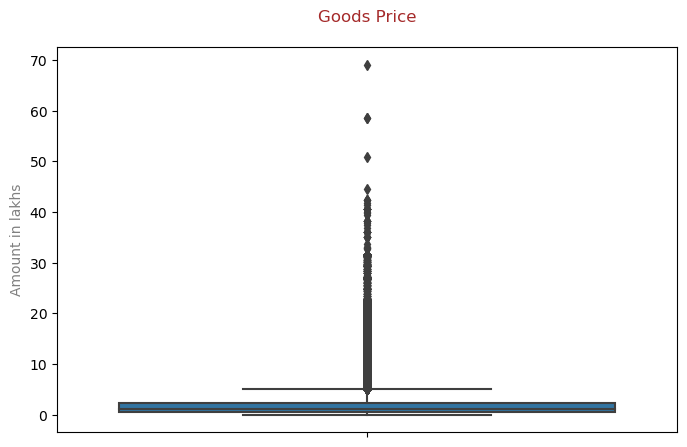

In [159]:
# Box plot AMT_GOODS_PRICE

var = previous_df['AMT_GOODS_PRICE']/100000
title = 'Goods Price\n'
label = 'Amount in lakhs'

outlier_plot(var,title,label)

In [160]:
# Check summary

previous_df['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [161]:
# Check the quantiles

previous_df['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
Name: AMT_GOODS_PRICE, dtype: float64

- There are certain highly priced goods after 0.95 quantile. Here we can set a cap value to ignore very high goods price.

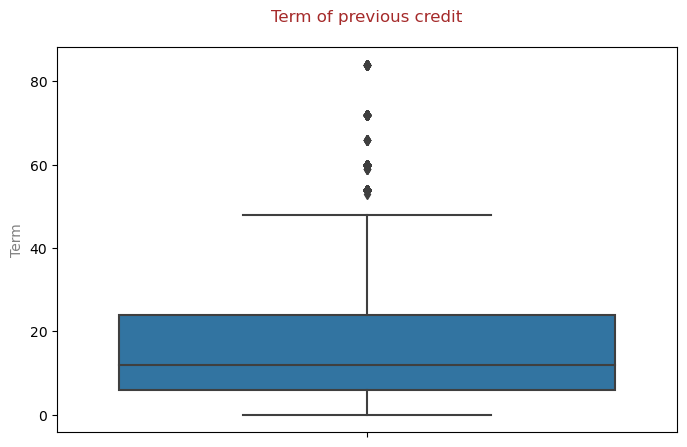

In [162]:
# Box plot CNT_PAYMENT

var = previous_df['CNT_PAYMENT']
title = 'Term of previous credit\n'
label = 'Term'

outlier_plot(var,title,label)

In [163]:
# Check summary

previous_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

- Missing values can be replaced with median and then we can change the data type to int.

## MERGING DATA SETS

Merge the application data frame and previous application data frame

In [164]:
# Merge both application_df and previous_df

finaldf = pd.merge(application_df, previous_df, on='SK_ID_CURR', how = 'inner')

# verify

finaldf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.003541       16765           1188               1186   
4                    0.010032       19046            225               4260   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [165]:
# Check the column info

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 116 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [166]:
# Rename the duplicated columns

finaldf = finaldf.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV',
                         'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [167]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 116 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_CURR       object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_CURR               float64 
 9    AMT_ANNUITY_CURR              float64 
 10   AMT_GOODS_PRICE_CURR          float64 
 11   NAME_TYPE_SUITE_CURR          object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [168]:
# Remove unwanted columns

finaldf.drop(['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
              'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI',
              'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','EMERGENCYSTATE_MODE',
              'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
             'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
             'NFLAG_INSURED_ON_APPROVAL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
              'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
              'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 
              'FLAG_PHONE','FLAG_EMAIL', 'EXT_SOURCE_2',
              'EXT_SOURCE_3', 'TOTALAREA_MODE','FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START_x',
              'WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [169]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 47 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   SK_ID_CURR               1413701 non-null  int64   
 1   TARGET                   1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_CURR  1413701 non-null  object  
 3   CODE_GENDER              1413646 non-null  object  
 4   FLAG_OWN_CAR             1413701 non-null  object  
 5   FLAG_OWN_REALTY          1413701 non-null  object  
 6   CNT_CHILDREN             1413701 non-null  int64   
 7   AMT_INCOME_TOTAL         1413701 non-null  float64 
 8   AMT_CREDIT_CURR          1413701 non-null  float64 
 9   AMT_ANNUITY_CURR         1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR     1412493 non-null  float64 
 11  NAME_TYPE_SUITE_CURR     1410175 non-null  object  
 12  NAME_INCOME_TYPE         1413701 non-null  object  
 13  NAME_EDUCATION_TYPE      14

### Univariate Analysis

Categorical Analysis

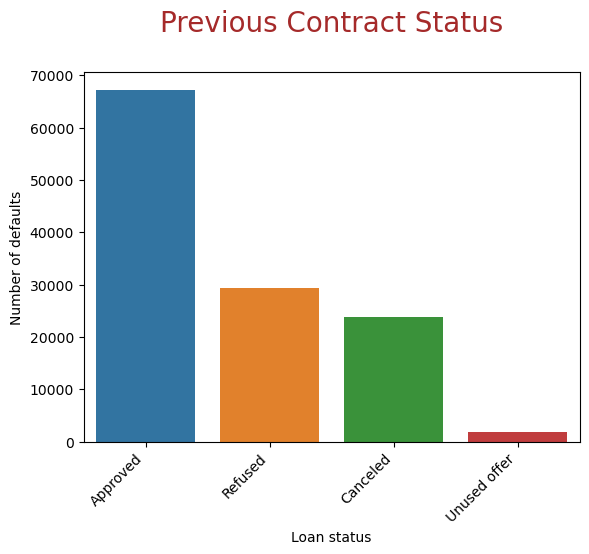

In [171]:
#NAME_CONTRACT_STATUS

tempdf = finaldf[['TARGET','NAME_CONTRACT_STATUS']].groupby(['NAME_CONTRACT_STATUS'], as_index=False).sum()
tempdf.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_STATUS', y = 'TARGET', data = tempdf)
plt.title('Previous Contract Status\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'} )
plt.xlabel('Loan status')
plt.ylabel('Number of defaults')
plt.xticks(rotation=45, ha='right')

plt.show()

- High number of defaulters have their loans approved in the past.
- Number of defaulters who have not used the offer is the minimum.

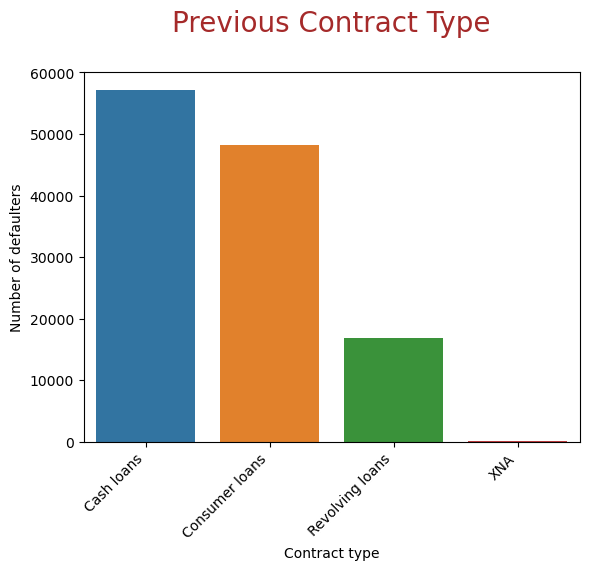

In [172]:
# NAME_CONTRACT_TYPE_PREV

tempdf = finaldf[['TARGET','NAME_CONTRACT_TYPE_PREV']].groupby(['NAME_CONTRACT_TYPE_PREV'], as_index=False).sum()
tempdf.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_TYPE_PREV', y = 'TARGET', data = tempdf)
plt.title('Previous Contract Type\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Contract type')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=45, ha='right')

plt.show()

- High number of defaults in case of cash loans followed by consumer loans in previous applications data.
- There are some missing contract types in the data.

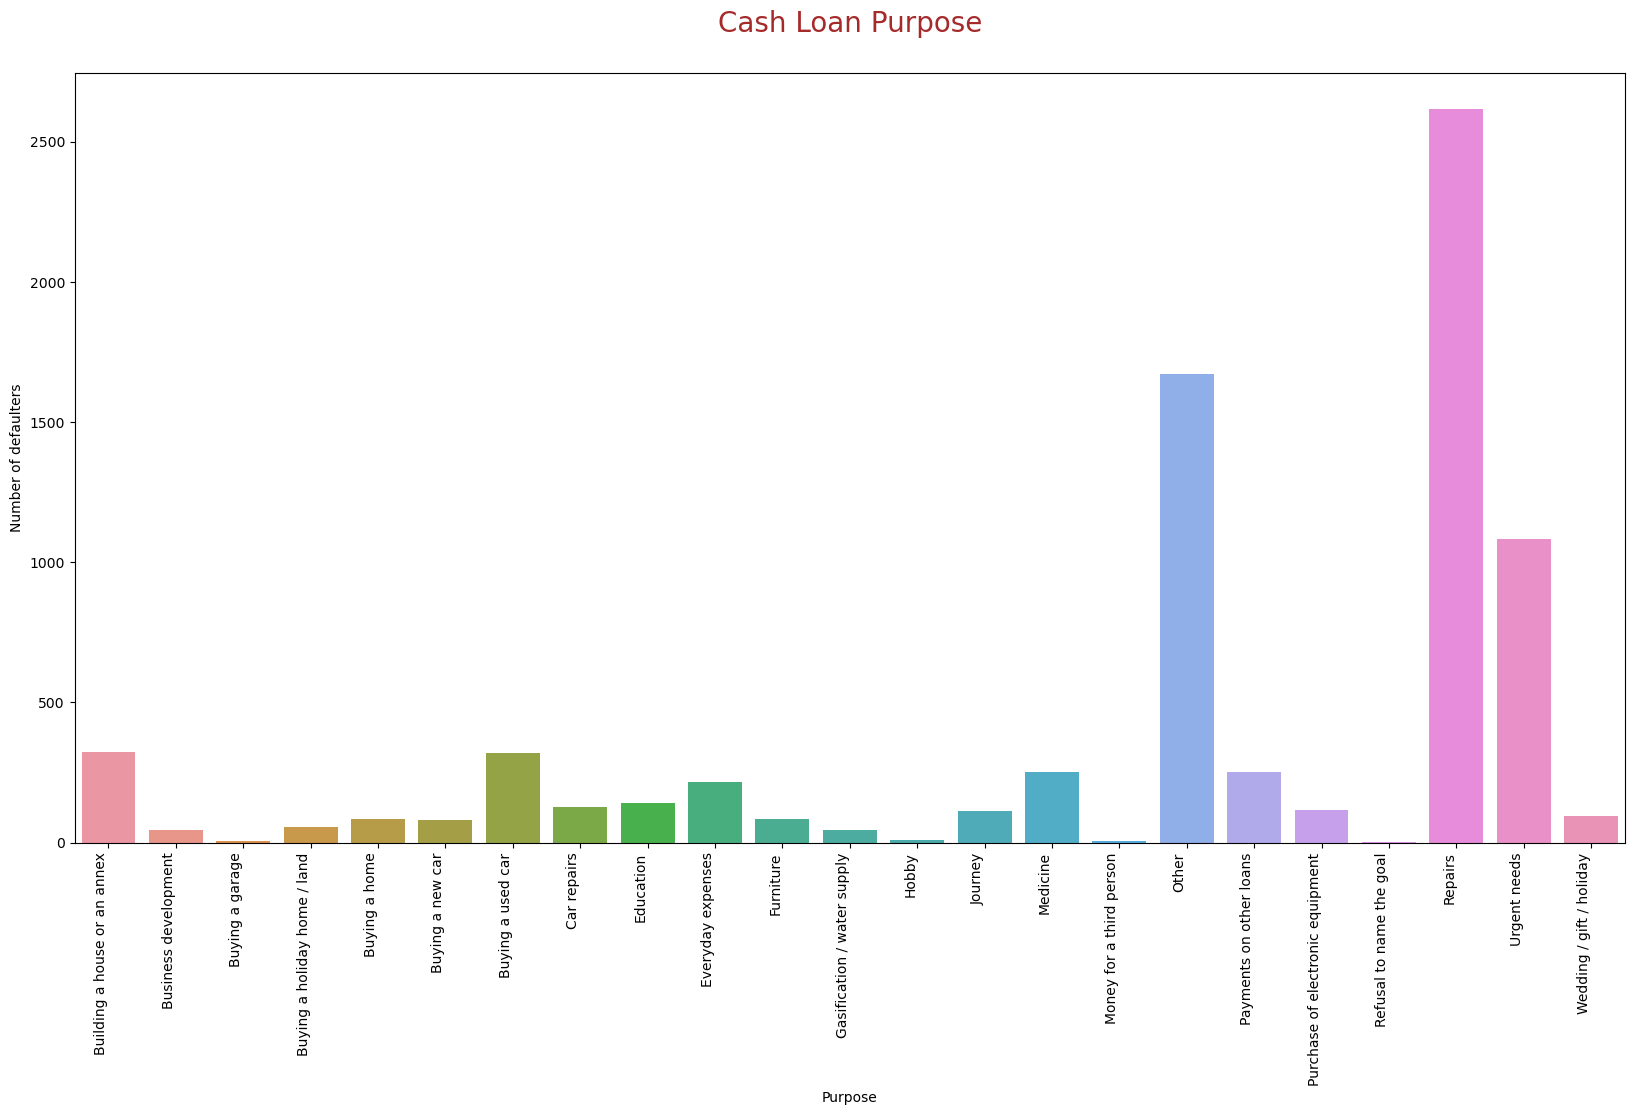

In [173]:
# NAME_CASH_LOAN_PURPOSE

tempdf = finaldf[finaldf['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
tempdf = tempdf[tempdf['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
tempdf = tempdf[['TARGET','NAME_CASH_LOAN_PURPOSE']].groupby(['NAME_CASH_LOAN_PURPOSE'], as_index=False).sum()

plt.figure(figsize=[20,10])
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y = 'TARGET', data = tempdf)
plt.title('Cash Loan Purpose\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Purpose')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90, ha='right')

plt.show()

- Loan applications with purpose such as Repairs, Urgent needs and Others etc. are more likely to default.
- Purpose such as buying a garage, home and hobby etc, have no difficulty in repayment.

Numerical Analysis

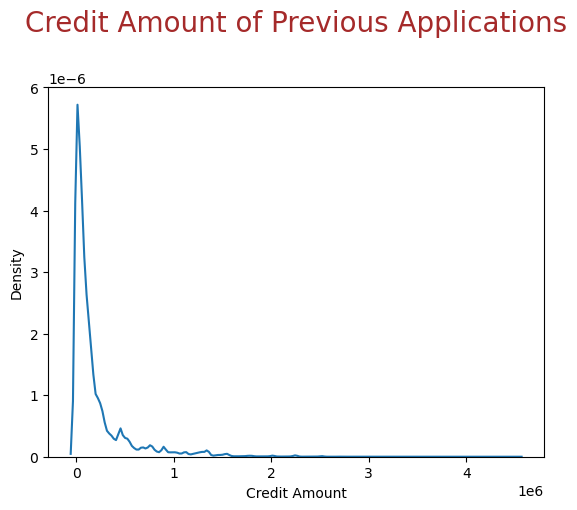

In [174]:
# Numerical data analysis

sns.distplot(finaldf['AMT_CREDIT_PREV'] , hist=False)
plt.title('Credit Amount of Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Credit Amount')
plt.show()

- In past, most of the loans had credit amount in the lower range i.e. below 1 lakh.

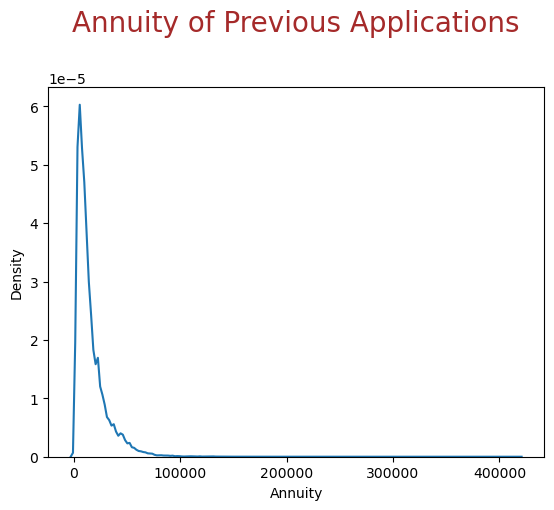

In [175]:
# Numerical data analysis

sns.distplot(finaldf['AMT_ANNUITY_PREV'] , hist=False)
plt.title('Annuity of Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Annuity')
plt.show()

- Previous applications annuity was also mostly below 1 lakh.

### Correlation

In [176]:
# Check the correlation

corrdf = finaldf[['AMT_ANNUITY_PREV','AMT_APPLICATION','AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].corr()
corrdf

AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
AMT_ANNUITY_PREV              1.000000         0.809972         0.817977   
AMT_APPLICATION               0.809972         1.000000         0.975683   
AMT_CREDIT_PREV               0.817977         0.975683         1.000000   
AMT_GOODS_PRICE_PREV          0.822204         0.999871         0.993201   

                      AMT_GOODS_PRICE_PREV  
AMT_ANNUITY_PREV                  0.822204  
AMT_APPLICATION                   0.999871  
AMT_CREDIT_PREV                   0.993201  
AMT_GOODS_PRICE_PREV              1.000000

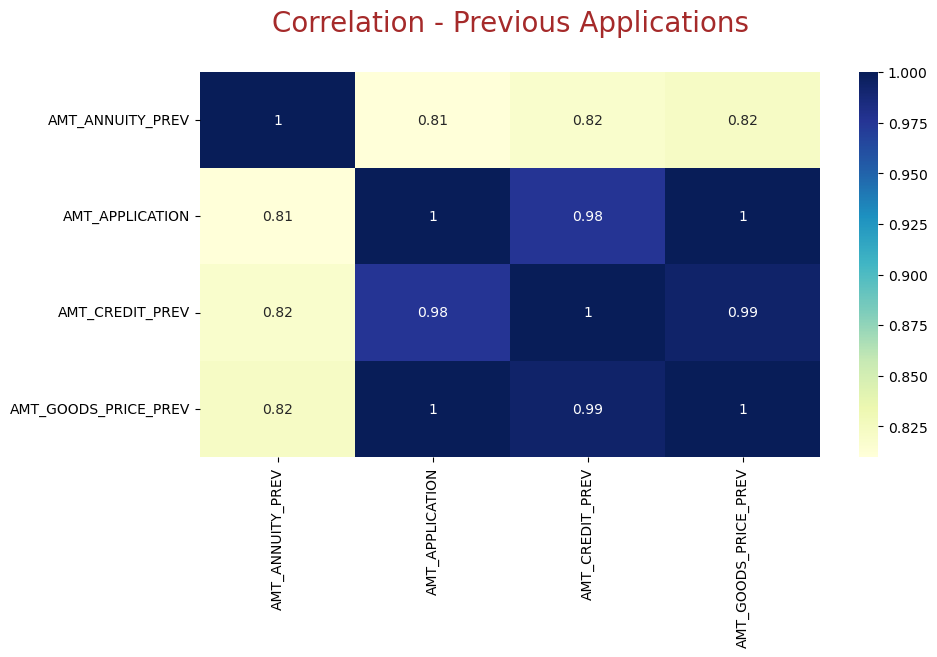

In [177]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[10,5])

sns.heatmap(corrdf, cmap="YlGnBu", annot = True)
plt.title('Correlation - Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

- From the above plot we can see that AMT_CREDIT_PREV is highly correlated to AMT_APPLICATION and AMT_GOODS_PRICE_PREV

### Bivariate Analysis

##### Categorical - Categorical

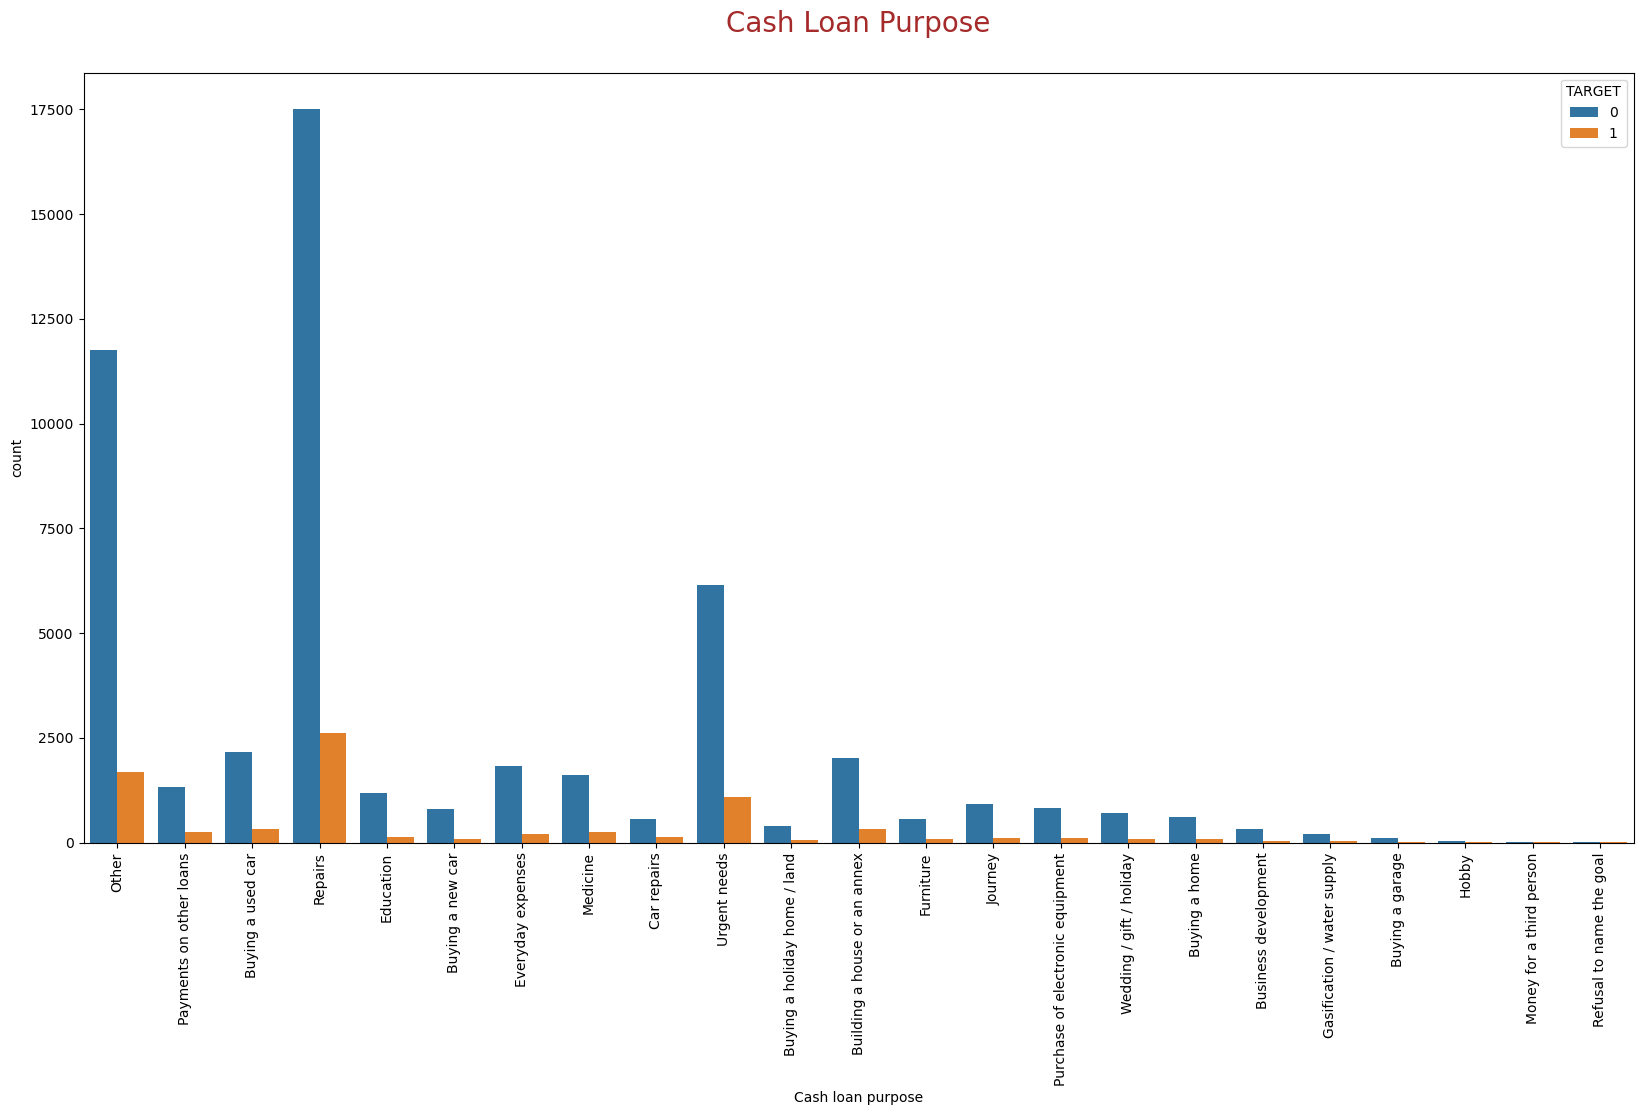

In [180]:
# Filter out 'XAP' and 'XNA' from 'NAME_CASH_LOAN_PURPOSE'
tempdf = finaldf[(finaldf['NAME_CASH_LOAN_PURPOSE'] != 'XAP') & (finaldf['NAME_CASH_LOAN_PURPOSE'] != 'XNA')]

plt.figure(figsize=[20, 10])
plt.title('Cash Loan Purpose\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='TARGET', data=tempdf)
plt.xlabel('Cash loan purpose')
plt.xticks(rotation=90)
plt.show()

- Loans taken for Repairs purpose are higher compared to others.
- Loan default chances is also higher for loans taken for repair purpose.

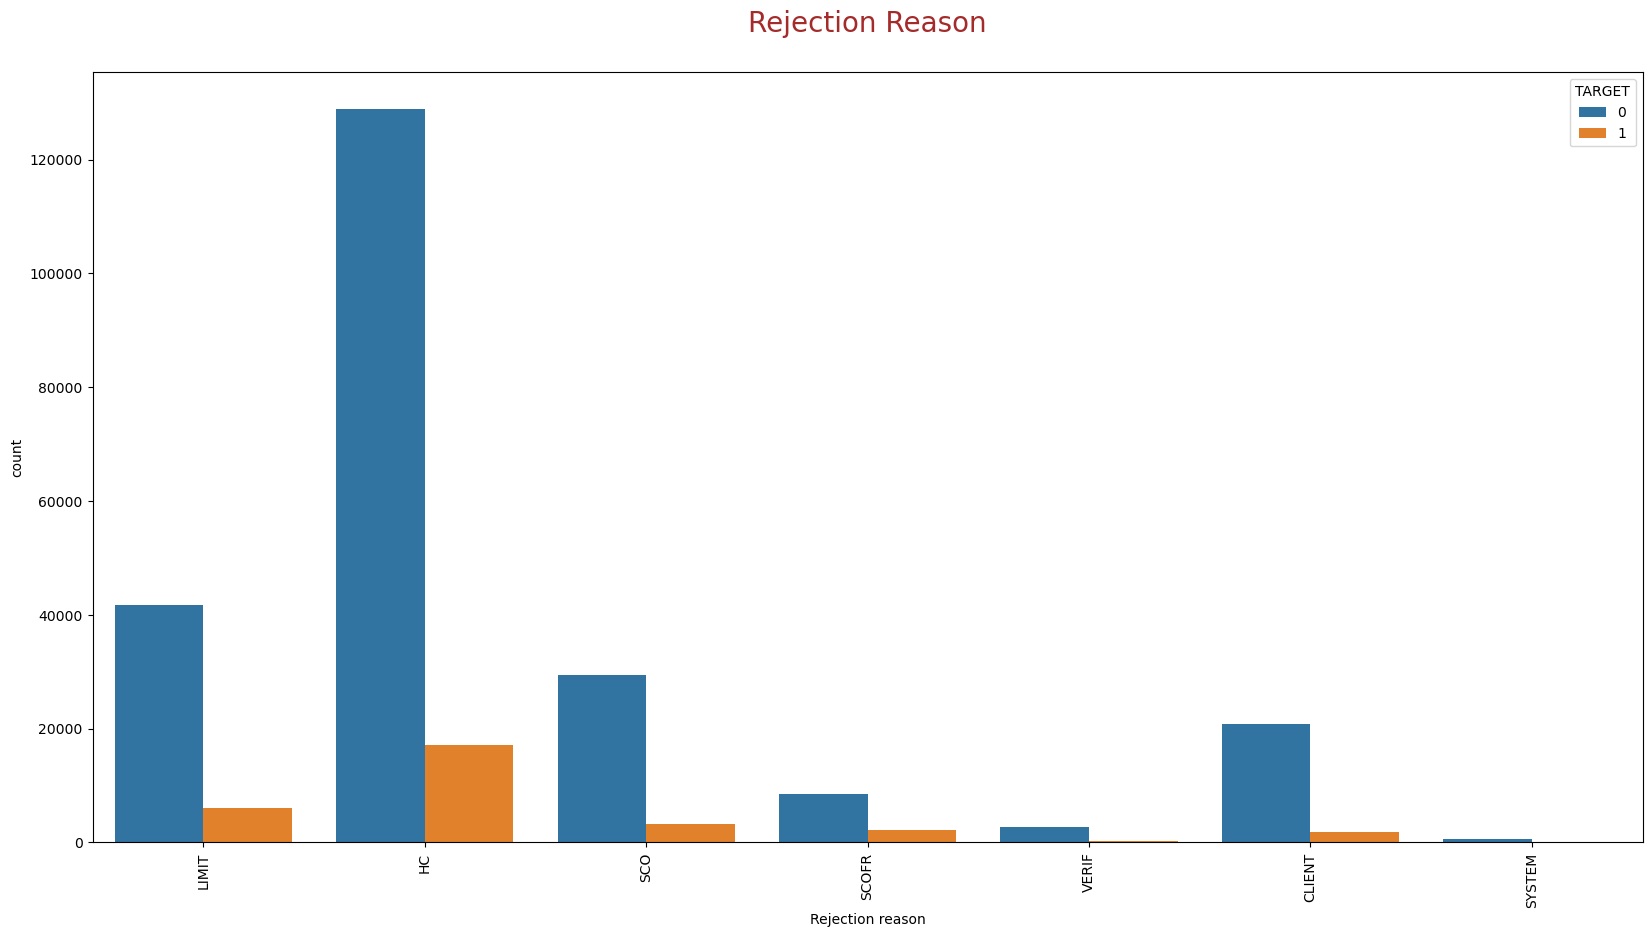

In [182]:
# NAME_CONTRACT_STATUS - CODE_REJECT_REASON

# Filter out 'XAP' and 'XNA' from 'NAME_CASH_LOAN_PURPOSE'
tempdf = finaldf[(finaldf['CODE_REJECT_REASON'] != 'XAP') & (finaldf['CODE_REJECT_REASON'] != 'XNA')]

plt.figure(figsize=[20, 10])
plt.title('Rejection Reason\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
sns.countplot(x='CODE_REJECT_REASON', hue='TARGET', data=tempdf)
plt.xlabel('Rejection reason')
plt.xticks(rotation=90)
plt.show()

- Most of the applications were rejected for rejection code - HC. It also has the higher number of defaulters.
- Rejection by system is very less.

##### Categorical - Continuous

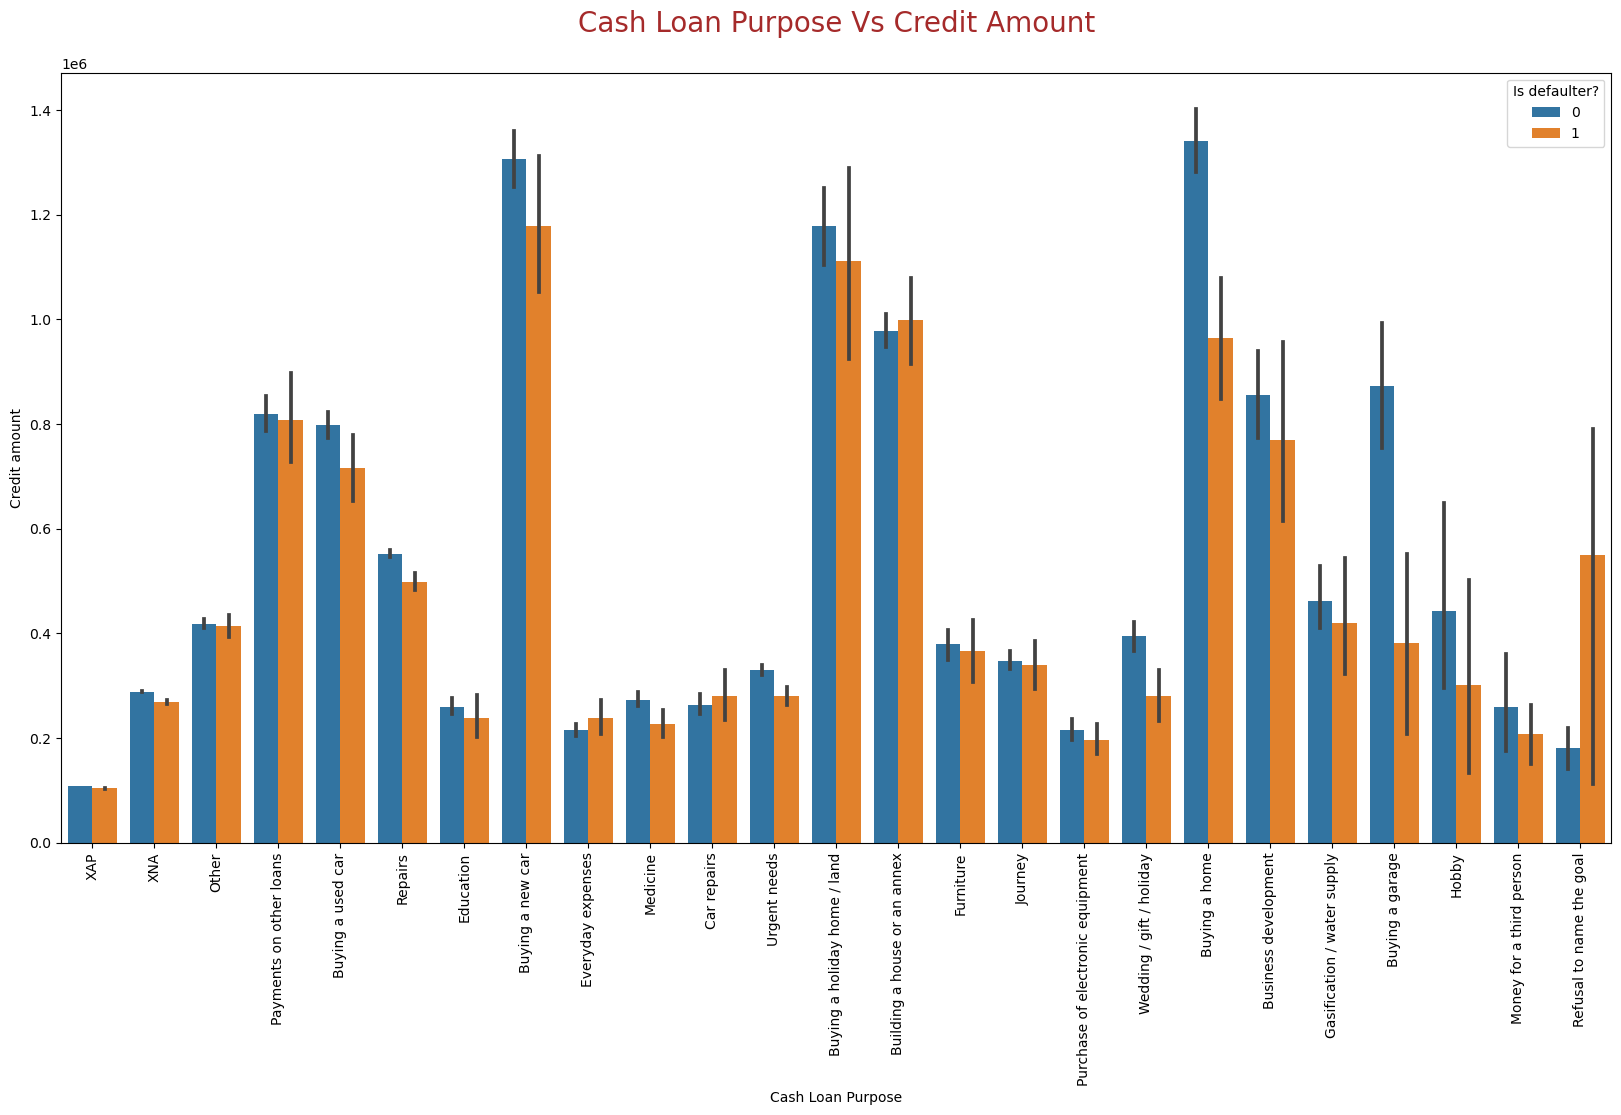

In [183]:
# NAME_CASH_LOAN_PURPOSE -  AMT_CREDIT_PREV


plt.figure(figsize=(20,10))
plt.title('Cash Loan Purpose Vs Credit Amount\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.barplot(x=finaldf['NAME_CASH_LOAN_PURPOSE'], y=finaldf['AMT_CREDIT_PREV'], hue=finaldf['TARGET'] )
plt.xlabel('Cash Loan Purpose')
plt.ylabel('Credit amount')
plt.xticks(rotation=90)
plt.legend(title='Is defaulter?', loc= 'upper right')
plt.show()

- People taking cash loans with high credit amount but have refused to name the purpose are more likely to default.
- Less chances of defaulting in case of home loans.

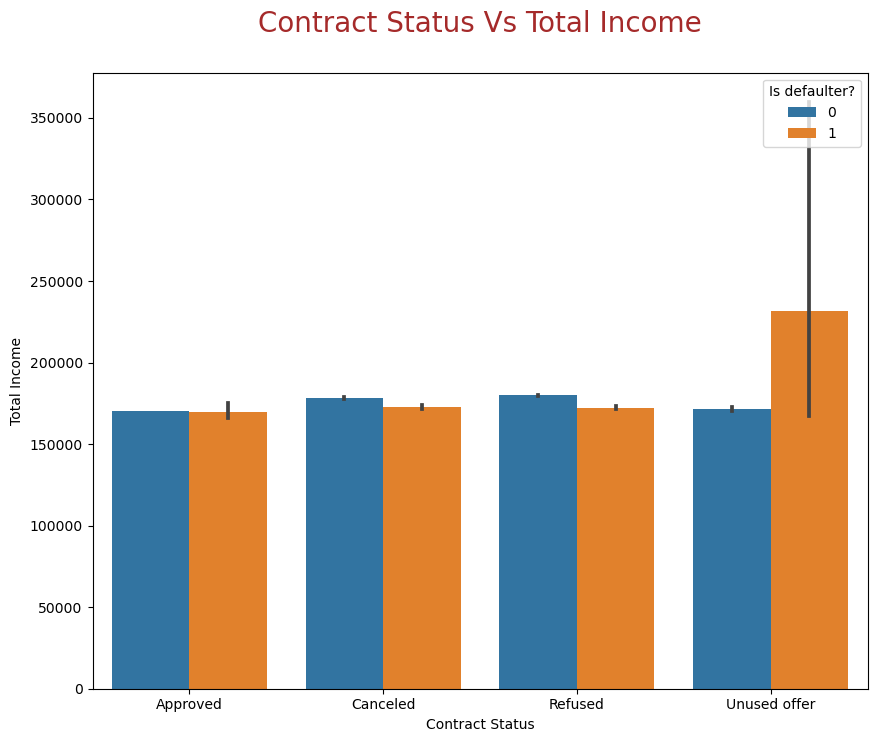

In [184]:
# NAME_CONTRACT_STATUS - AMT_INCOME_TOTAL

plt.figure(figsize=(10,8))
plt.title('Contract Status Vs Total Income\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.barplot(x=finaldf['NAME_CONTRACT_STATUS'], y=finaldf['AMT_INCOME_TOTAL'], hue=finaldf['TARGET'] )
plt.xlabel('Contract Status')
plt.ylabel('Total Income')
plt.legend(title='Is defaulter?', loc= 'upper right')
plt.show()

- This graph shows the people who have unused offers are more likely to default even though they have comparatively high total income.

##### Continuous - Continuous

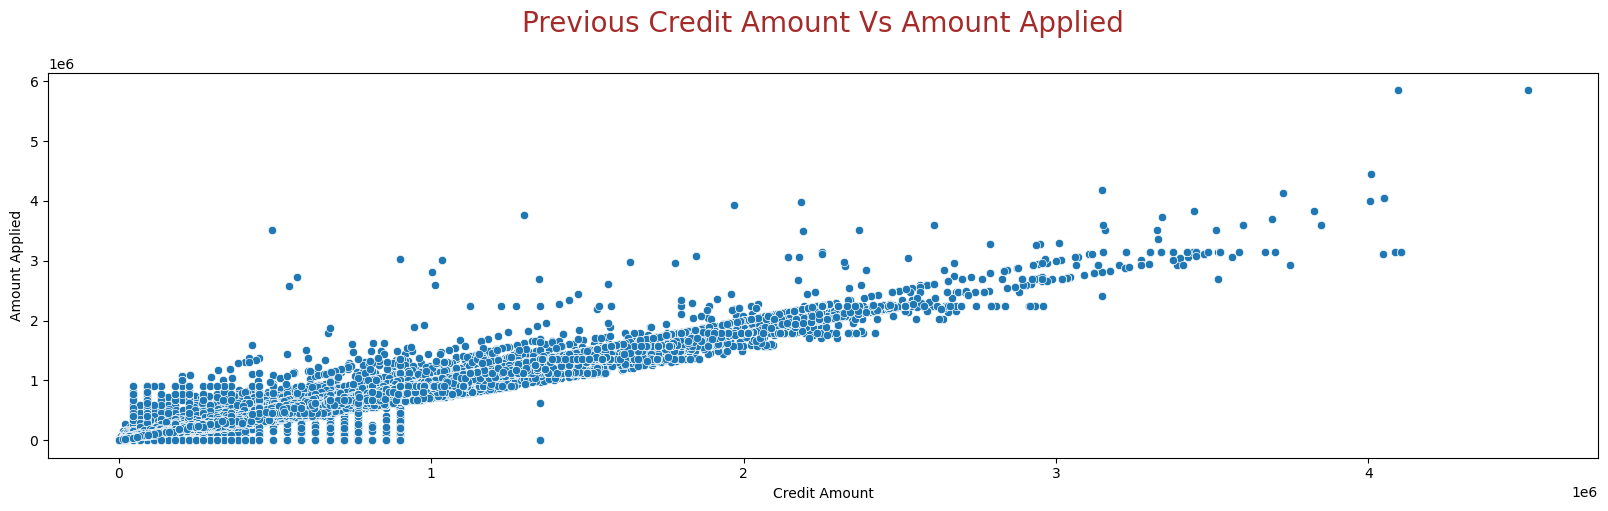

In [185]:
# AMT_CREDIT_PREV - AMT_APPLICATION

plt.figure(figsize=[20,5])
plt.title('Previous Credit Amount Vs Amount Applied\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(x = finaldf['AMT_CREDIT_PREV'], y = finaldf['AMT_APPLICATION'])
plt.xlabel('Credit Amount')
plt.ylabel('Amount Applied')
plt.show()

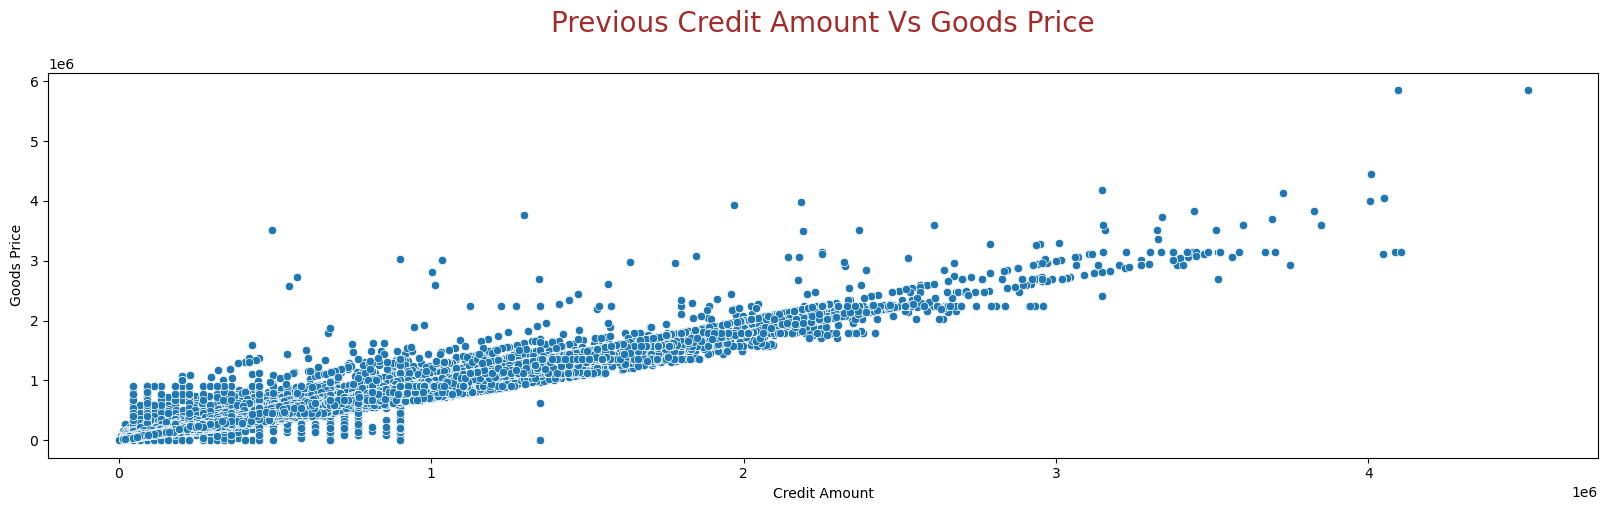

In [186]:
# AMT_CREDIT_PREV - AMT_GOODS_PRICE_PREV

plt.figure(figsize=[20,5])
plt.title('Previous Credit Amount Vs Goods Price\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(x = finaldf['AMT_CREDIT_PREV'], y = finaldf['AMT_GOODS_PRICE_PREV'])
plt.xlabel('Credit Amount')
plt.ylabel('Goods Price')
plt.show()

- As we can see from the above 2 plots that Credit Amount is highly correlated to Goods Price and the Amount applied by the client on previous loan applcations.
- With an increase in credit amount, applied amount and goods price, the tendency to default decreases. 
- High chances of defaulting for lower credit amount, applied amount and goods price.


## Conclusion

From the above analysis, we have gathered the below insights -

1. People who are more likely to default-

- Age : Young people – 25 to 35 age group
- Income : Lower income group with a total income of less than 5 lakhs
- Occupation : Low-skill labourers, drivers, waiters/barmen staff
- Education : Lower / secondary education
- Gender : Males
- Income type : On maternity leave and unemployed
- Family status : Civil marriage, single/unmarried
- Housing type : Rented apartment or with parents
- Contract type: Cash loan 
- Cash loan purpose : Repairs and urgent needs
- Previous loan status : Approved 


2. People who will repay on time-

- Age : Older people – above 50
- Income : Higher income group 
- Occupation : Managers, High-skilled tech staff, Accountants
- Education : Higher education and academic degree
- Gender : Females
- Income type : Working class, businessmen and students
- Family status : Married
- Housing type : Own house/apartment
- Contract type: Revolving loan 
- Cash loan purpose : Buying garage, home etc.
- Previous loan status : Unused offer

**EDA Conclusion** -

- Young males with lower secondary education and of lower income group and staying with parents or in a rented house, applying for low-range cash contract, should be denied.

- Females are likely to repay but not if they are on maternity leave. Hence, bank can reduce the loan amount for female applicants who are on maternity leave.

- Since people taking cash loans for repairs and urgent needs are more likely to default, bank can refuse them.

- Since the people who have unused offers are more likely to default even though they have comparatively high total income, they can be offered loan at a higher interest rate.

- Banks can target businessmen, students and working class people with academic degree/ higher education as they have no difficulty in repayment.

- Bank can also approve loans taken on purpose for buying home or garage as there less chances of defaulting. 


---------------

## PART 2 - Feature Engineering + Modeling

In [242]:
import matplotlib.style as style
import seaborn as sns
import itertools
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

### Cleaning the Data

In [243]:
applicationdf = pd.read_csv('application_data.csv')
previousdf = pd.read_csv('previous_application.csv')

In [245]:
numeric_value_appl = applicationdf.select_dtypes(include=['int', 'float']).fillna(-1)
# For categorical value, I will fill missing value with 'None'
categorical_value_appl = applicationdf.select_dtypes(include=['object']).fillna('None')

application_cleaned = numeric_value_appl.join(categorical_value_appl)

print(application_cleaned.isnull().any().unique())  # [False]
# Capture 106 columns, which matched the number from the profiling report, and now all the numeric
# columns have no missing value.

print('The shape of cleaned dataset is {}'.format(application_cleaned.shape))
print('The shape of original dataset is {}'.format(applicationdf.shape))

[False]
The shape of cleaned dataset is (307511, 122)
The shape of original dataset is (307511, 122)


In [246]:
application_cleaned.loc[application_cleaned['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
application_cleaned.loc[application_cleaned['DAYS_EMPLOYED'] == 1, 'DAYS_EMPLOYED'] = 0
print(application_cleaned['DAYS_EMPLOYED'].max())  # now the maximum value is 0

application_cleaned.loc[application_cleaned['EMERGENCYSTATE_MODE'] == 'Yes','EMERGENCYSTATE_MODE'] = 1
application_cleaned.loc[application_cleaned['EMERGENCYSTATE_MODE'] == 'No', 'EMERGENCYSTATE_MODE'] = 0

print('Finish!')
print('The shape of cleaned dataset is {}'.format(application_cleaned.shape))

0
Finish!
The shape of cleaned dataset is (307511, 122)


In [247]:
column_df_appl = pd.DataFrame(numeric_value_appl.columns.values, columns=['col_name'])
column_df_appl['Contains_day'] = column_df_appl['col_name'].str.contains('days', case=False)
col_for_modification_appl = column_df_appl[column_df_appl['Contains_day'] == True]['col_name'].values

print('Here are columns need modification:')
print(col_for_modification_appl)

for col in col_for_modification_appl:
    application_cleaned.loc[:,col] = round(abs(application_cleaned.loc[:, col] // 365) , 2)
    name = col.replace('DAYS', 'YEARS')
    application_cleaned.rename(columns={col:name}, inplace=True)

print('The shape of cleaned dataset is {}'.format(application_cleaned.shape))

Here are columns need modification:
['DAYS_BIRTH' 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH'
 'DAYS_LAST_PHONE_CHANGE']
The shape of cleaned dataset is (307511, 122)


In [248]:
# make a copy of cleaned data for building 
train_df = application_cleaned.copy()
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to EMERGENCYSTATE_MODE
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


### Clustering on Loan Data

In [258]:
# Applied the K-modes for clustering loan defaulter and summerize their character
# Select the loan defaulter data
defaulter_df = application_cleaned[application_cleaned['TARGET'] == 1]
print(defaulter_df.shape)
# Select features relevant to user profiling
profiling_feature_list = ['CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_INCOME_TYPE',
                          'NAME_EDUCATION_TYPE','YEARS_BIRTH','YEARS_EMPLOYED','OCCUPATION_TYPE',
                          'ORGANIZATION_TYPE', 'CNT_CHILDREN','NAME_TYPE_SUITE','NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                          'OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE',
                          'AMT_ANNUITY','AMT_GOODS_PRICE']
defaulter_profiling_df = defaulter_df[profiling_feature_list]
print(defaulter_profiling_df.info())
print(defaulter_profiling_df.isnull().any())

(24825, 122)
<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CODE_GENDER                  24825 non-null  object 
 1   AMT_INCOME_TOTAL             24825 non-null  float64
 2   AMT_CREDIT                   24825 non-null  float64
 3   NAME_INCOME_TYPE             24825 non-null  object 
 4   NAME_EDUCATION_TYPE          24825 non-null  object 
 5   YEARS_BIRTH                  24825 non-null  int64  
 6   YEARS_EMPLOYED               24825 non-null  int64  
 7   OCCUPATION_TYPE              24825 non-null  object 
 8   ORGANIZATION_TYPE            24825 non-null  object 
 9   CNT_CHILDREN                 24825 non-null  int64  
 10  NAME_TYPE_SUITE              24825 non-null  object 
 11  NAME_FAMILY_STATUS           24825 non-null  object 
 12  NAME_HOUSING_TYPE            24825 non-null  object 
 13  CNT_FAM

In [259]:
cat_col = defaulter_profiling_df.select_dtypes(include=['category']).columns.values
print(cat_col)
for column in cat_col:
    defaulter_profiling_df = defaulter_profiling_df.astype({column:'object'})
    
# Double check the dataframe and ensure there is no NaN value in it.
print(defaulter_profiling_df.info())
defaulter_profiling_df.fillna('Unknown', inplace=True)
print(defaulter_profiling_df.head())

[]
<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CODE_GENDER                  24825 non-null  object 
 1   AMT_INCOME_TOTAL             24825 non-null  float64
 2   AMT_CREDIT                   24825 non-null  float64
 3   NAME_INCOME_TYPE             24825 non-null  object 
 4   NAME_EDUCATION_TYPE          24825 non-null  object 
 5   YEARS_BIRTH                  24825 non-null  int64  
 6   YEARS_EMPLOYED               24825 non-null  int64  
 7   OCCUPATION_TYPE              24825 non-null  object 
 8   ORGANIZATION_TYPE            24825 non-null  object 
 9   CNT_CHILDREN                 24825 non-null  int64  
 10  NAME_TYPE_SUITE              24825 non-null  object 
 11  NAME_FAMILY_STATUS           24825 non-null  object 
 12  NAME_HOUSING_TYPE            24825 non-null  object 
 13  CNT_FAM_MEMBERS  

In [264]:
temp_df = defaulter_profiling_df.copy()
for col_name in temp_df.select_dtypes('object').columns.values:
    value_list = temp_df[col_name].unique()
    for index, value in enumerate(value_list):
        temp_df[col_name].replace(value, index, inplace=True)

print(temp_df.head()) 

pca = PCA()
pca.fit(temp_df)
pca_samples = pca.transform(temp_df)
variance_ratio = pca.explained_variance_ratio_

print('explained_variance_ratio_:{}'.format(pca.explained_variance_ratio_))

    CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  NAME_INCOME_TYPE  \
0             0          202500.0    406597.5                 0   
26            1          112500.0    979992.0                 0   
40            0          202500.0   1193580.0                 1   
42            1          135000.0    288873.0                 0   
81            1           81000.0    252000.0                 2   

    NAME_EDUCATION_TYPE  YEARS_BIRTH  YEARS_EMPLOYED  OCCUPATION_TYPE  \
0                     0           26               2                0   
26                    0           52               8                1   
40                    0           48               4                0   
42                    0           37              10                2   
81                    0           68               0                3   

    ORGANIZATION_TYPE  CNT_CHILDREN  NAME_TYPE_SUITE  NAME_FAMILY_STATUS  \
0                   0             0                0                   0   
26    

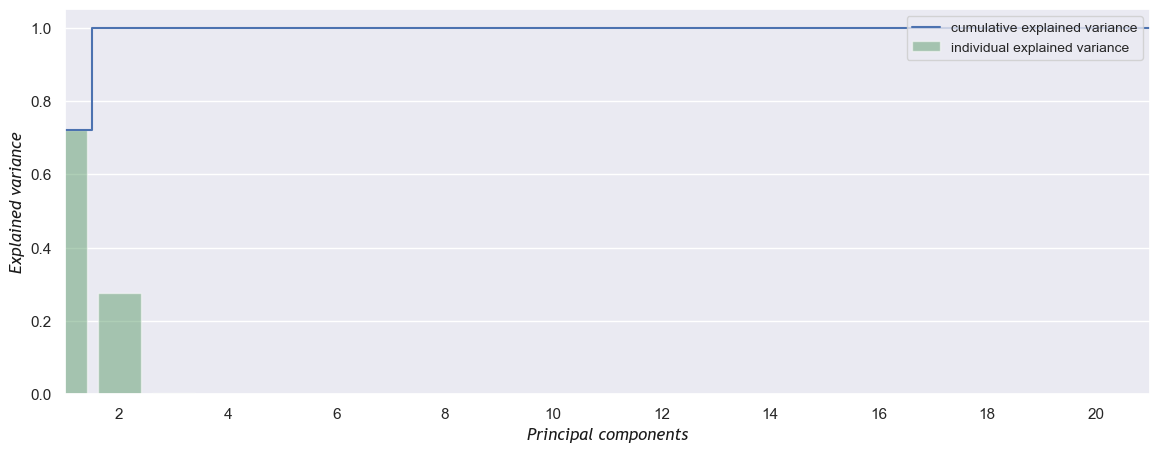

In [266]:
# Visualize the explained_variance_ratio
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(temp_df.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1, temp_df.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color='g', label='individual explained variance')
plt.xlim(0, 20)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', **content_font)
plt.xlabel('Principal components', **content_font)
plt.legend(loc='upper right', fontsize = 10)

-----

### Random Forest

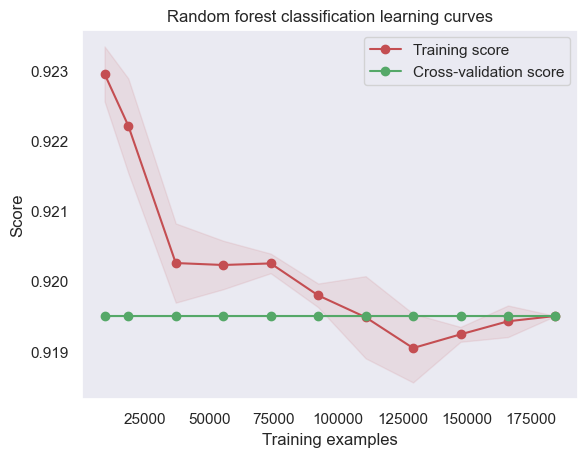

In [278]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Plot learning curve function
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=1, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the RandomForestClassifier
rfc_best = RandomForestClassifier(n_estimators=120, max_depth=3, random_state=1)

# Plot the learning curve
rfc_learning_curve = plot_learning_curve(rfc_best, "Random forest classification learning curves", 
                                         X_train, Y_train, cv=5, 
                                         train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
rfc_learning_curve.show()


As we can see from the diagram, the training and cross-validation score converge towards the same limit when the training samples increase, and the score performance is good. This means the prediction model neither has overfitted nor underfit problems.

(if the model has to underfit problems, both score performance of training and cross_validation dataset will be low;

On the other hand, if the model has overfitted problems, the training and cross-validation score converge towards the same limit but there is a obvious gap between them when the training example reached its maximum value)



In [279]:
# test the prediction performance using the X-train dataset
rfc_best.fit(X_train, Y_train)
Y_predict = rfc_best.predict_proba(X_test)[:,1]
print(Y_predict)
print(rfc_best.classes_)
print(roc_auc_score(Y_test, Y_predict))

[0.06415442 0.09483616 0.08829253 ... 0.08948133 0.06426616 0.07304601]
[0 1]
0.7093644114303688


**Here are the instructions for evaluating model performance through roc_auc_score:**

1、roc_auc_score=0.5, the model has no diagnostic value because the model just randomly 'guesses' a value as the prediction result.

2、0.5 < roc_auc_score < 0.7, the model can predict the tendency of loan defaulters, but the precision rate is not good at all.

3、0.7 < roc_auc_score < 0.9, the model can predict the tendency of loan defaulters with a reasonably good precision rate.

4、0.9 < roc_auc_score < 1, the model can predict whether the applicant is a loan defaulter at a high precision rate

In [280]:
# Print out the ro curve for reference
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
result = pd.DataFrame([thresholds,tpr,fpr], index= ['threshold','TPR','FPR']) 
print(result)

              0         1         2         3         4         5      \
threshold  1.139553  0.139553  0.138082  0.138060  0.137671  0.137311   
TPR        0.000000  0.000000  0.000000  0.000160  0.000160  0.000479   
FPR        0.000000  0.000014  0.000028  0.000028  0.000042  0.000042   

              6         7         8         9         10        11     \
threshold  0.136927  0.136058  0.136041  0.135932  0.135757  0.135726   
TPR        0.000479  0.000799  0.000799  0.001118  0.001118  0.001278   
FPR        0.000057  0.000057  0.000071  0.000071  0.000099  0.000099   

              12        13        14        15        16        17     \
threshold  0.135544  0.134542  0.134397  0.134008  0.133912  0.133830   
TPR        0.001278  0.002077  0.002077  0.002396  0.002396  0.002556   
FPR        0.000113  0.000113  0.000170  0.000170  0.000184  0.000184   

              18        19        20        21        22        23     \
threshold  0.133692  0.133535  0.133101  0.13307

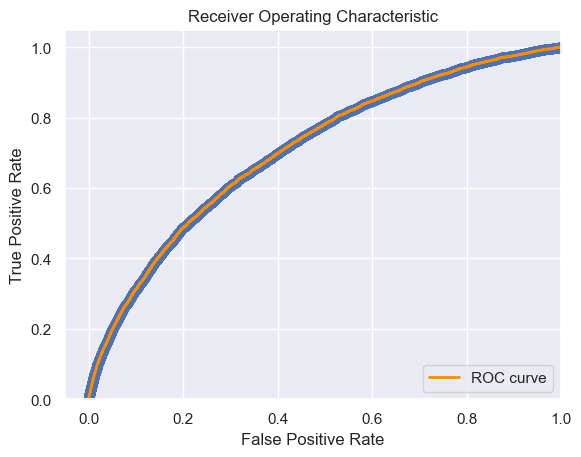

In [281]:
plt.figure() 
plt.scatter(fpr, tpr) 
# plot the roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve') 
plt.xlim([-0.05, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 

In [282]:
# print out the feature importance
feature_importance_df = pd.DataFrame(data=rfc_best.feature_importances_, index=rfc_best.feature_names_in_)
feature_importance_df.sort_values(0, ascending=False, inplace=True)
print(feature_importance_df)

                                              0
EXT_SOURCE_2                           0.181941
EXT_SOURCE_3                           0.135399
EXT_SOURCE_1                           0.073067
YEARS_BIRTH                            0.058044
YEARS_EMPLOYED                         0.037148
...                                         ...
NAME_HOUSING_TYPE_Co-op apartment      0.000000
NAME_HOUSING_TYPE_Municipal apartment  0.000000
NAME_HOUSING_TYPE_Office apartment     0.000000
NAME_HOUSING_TYPE_Rented apartment     0.000000
SK_ID_CURR                             0.000000

[251 rows x 1 columns]


-------

## Conclusion

**Decisive Factor whether an applicant will be a defaulter:**

- CODE_GENDER: Men have a relatively higher defaulter rate than women
- NAME_EDUCATION_TYPE: Applicants with Lower Secondary & Secondary education has higher risk of rejecting repay loans
- YEARS_BIRTH: Young adults (age under 30) have the higher defaulter rate
- YEARS_EMPLOYED: People who have less than 5 years of employment have a relatively high defaulting rate.
- OCCUPATION_TYPE: Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff are the high-risk occupation since the defaulting rate is huge.
- ORGANIZATION_TYPE: The top 5 high-risk organization types are: Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
- CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 more children (6 more family members) will have a higher defaulting rate than the other groups.
- NAME_TYPE_SUITE: Other_B type have the highest defaulting rate
- NAME_FAMILY_STATUS: People who have civil marriages or who are single default a lot.
- NAME_HOUSING_TYPE: Rented apartments or living with parents will potentially increase the risk of rejecting repaying loans.
- OWN_CAR_AGE: Applicants own cars with 10+ years has relative higher defaulting rate.
- NAME_INCOME_TYPE: Clients who are either on Maternity leave OR Unemployed default a lot.
- REGION_RATING_CLIENT: People who live in the area with Rating 3 have the highest defaults.
- NAME_CONTRACT_TYPE: Application with cash loans has more risk of losing loans than revolving loans.
- AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

**In terms of the loan defaulter data, there are no clear boundaries to classify the loan defaulters, so I summarize the top 10 characteristics showing up most frequently in loan defaulters.**

- NAME_CONTRACT_TYPE_Cash loans,

- NAME_HOUSING_TYPE_House / apartment,

- NAME_TYPE_SUITE_Unaccopanied,

- NAME_EDUCATION_TYPE_Secondary/secondary special,

- REGION_RATING_CLIENT_W_CITY_2,

- OWN_CAR_AGE_Unkown,

- FLAG_OWN_CAR_N,

- FLAG_OWN_REALITY_Y,

- CNT_CHILDREN_No_Child,

- NAME_INCOME_TYPE_Working.

**To predict whether a client is a loan defaulter or not, the random forest with the best parameter setting can give a reasonably good reference according to the auc_roc_score.**

-----

### FUTURE WORK:

1. Exploring Data Structure:
The first step will be to visualize the data in its feature space. I'll use UMAP (Uniform Manifold Approximation and Projection) *still need to learn it, but researched about it* for this task, as it effectively preserves both local and global structures in the data. This will provide insights into the underlying patterns and clusters within the data, helping in the selection of appropriate models and feature engineering techniques.
2. Applying Lasso Regularization:
I'll apply Lasso regularization on top of a linear classifier to enhance model simplicity and prevent overfitting. This technique will help identify significant features by shrinking the less important ones to zero. I’ll evaluate the significance of features by checking their p-values and the absolute values of their coefficients, ensuring that only relevant features are retained.
3. Domain Knowledge Acquisition:
I'll dedicate more time to deepening my understanding of Loans and related financial concepts. This domain knowledge will be crucial during the feature engineering phase, allowing me to create more meaningful and predictive features that align with the real-world context of the data.
4. Experimenting with Different Models:
I plan to experiment with K-Nearest Neighbors (KNN) and Support Vector Machines (SVM). These models will provide a diverse set of approaches to classification, and comparing their performance will help in selecting the best model for the dataset.
5. Reviewing Previous Applications:
I’ll allocate additional time to study previous applications and research in similar domains. Understanding the strategies and methodologies applied in prior work will provide valuable insights that can influence and improve the current project.
6. Additional Considerations:
I’ll ensure thorough documentation of all steps and results to facilitate iterative improvement and knowledge sharing, see alternative methods to also the PCA, etc.